# Introduction <a name="1"></a>


[The Heritage Health Prize (HHP)](https://www.heritagehealthprize.com/c/hhp) was a data science challenge sponsored by [The Heritage Provider Network](http://www.heritageprovidernetwork.com) and posted on Kaggle.  It took place from April 4, 2011 to April 4, 2013.  For information on the winning entries, please see [here](http://www.heritagehealthprize.com/c/hhp/details/milestone-winners).

In this notebook, we follow a traditional data science project process to address the HHP challenge of predicting future hospital stays using past patient treatment information.  

* We extract, transform, and load the data (**ETL**).
* Along the way, we do some exploratory data analysis (**EDA**).
* We conduct **feature engineering**.    
* We then **create models, evaluate their performance, and fine tune their parameters**.  
* We write up our **results**.  

To start you off, we will perform some basic visualization, feature engineering and preprocessing on the data provided.  Then, we build a baseline model using the mean of our training targets to predict our Days in the Hospital for our test set.  Finally, we will build a second model using linear regression over the following features to see if we can improve on our baseline model:

* numerical features
  * `'ClaimsTruncated', 'AgeI', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay',
       'min_LOS', 'avg_LOS', 'max_LOS', 'avg_dsfs', 
       'min_DrugCount', 'months_DrugCount',
       'max_DrugCount', 'avg_LabCount', 'max_LabCount', 'months_LabCount',
       'min_LabCount'`
* Categorical features
  * `Sex of patient`
* Target variable: Number of days a patient will spend in hosptial over the following year


## Introductory Phase:


### Major updates in the introductory phase.
* Downloaded the data
* ETL the data to generate training and test sets
* Some basic feature engineering
* Built a pipeline for feature engineering and for modeling
* Built a baseline model using linear regression
* Started planning for phase 2

### Major plans for Phase 1
* Plan to engineering features
* Finetune hyperparameters for various machine learning pipelines
* Find and complete the "TASKS" throughout the notebook; use these as starting points for your own experimentation

### Open problems
 * None to report




## Phase-1 Updates:

### Major updates in Phase 1 
* EDA completed 
* Use of EDA to drive data preparation & add new features from the existing tables
* Extended pre-processing pipeline to include grid search
* Generated predictions based on baseline, linear regression, and linear regression with grid search for k-features and best imputer
* Compared models via the t-test

### Major plans for the next Phase 
* Additional feature engineering
* Test and tune additional models: Random forest, etc


### Open problems
 * None to report
 
### Student Collaboration
* Both students worked on this phase indpendently and collaborated to complete the final steps; both students took a similar approach and we've chosen to use Jay's code (because it's much neater and easier to follow!)
* Jay completed the majority of the code presented here
* Alicia added final model comparisons (t-test) and developed the presentation for phase 1


## Phase-2 Updates:

### Major updates in Phase 2 
* ....

### Major plans for the next Phase 
* .....

### Open problems
 * None to report
 



## Final Project Submission:

### Major past updates for the final phase 
* ....

### Plans for future improvement 
* .....

### Open problems
 * None to report

# ETL Phase: Load and Preprocess Data

**A copy of the HHP dataset can be downloaded [here](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AADp4D50rGM61hpaSThZnqF3a/HHP_release3?dl=0).  It consists of the following files: ** 
1.  [Claims.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AADAkd0WulfgFthMibmIBtJoa/HHP_release3/Claims.csv?dl=0)  (Claims Data - features)
2.  [DaysInHospital_Y2.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AAD0_gwrKFo657caVjV3mjZVa/HHP_release3/DaysInHospital_Y2.csv?dl=0)  (Target Data for Year 2 - labels)
3.  [DaysInHospital_Y3.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AACmJkf7txiQiPZ_jd5cqsf3a/HHP_release3/DaysInHospital_Y3.csv?dl=0)  (Target Data for Year 3 - labels)
4.  [DrugCount.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AAA_9IxBOsoBSqyhlu7x8z2qa/HHP_release3/DrugCount.csv?dl=0)  (Drug Count Data - features)
5.  [LabCount.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AABxVuWLtBLqdYr6pyJCPsfga/HHP_release3/LabCount.csv?dl=0)  (Lab Count Data - features)
6.  [Members.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AACgVHEh2yUxzavQlurF8hfla/HHP_release3/Members.csv?dl=0)  (Members Data -features)
7.  [Target.csv](https://www.dropbox.com/sh/upt0j2q44ncrn1m/AAD7M6yWTsRtToS7uKmbWrA7a/HHP_release3/Target.csv?dl=0)  (Target Data for Year 4 - labels)



The full dataset is comprised of 5 tables as follows:


1. Members Table, which will include:
    1. MemberID (a unique member ID)
    2. AgeAtFirstClaim (member's age when first claim was made in the Data Set period)
    3. Sex


2. Claims Table, which will include:
    1. MemberID
    2. ProviderID (the ID of the doctor or specialist providing the service)
    3. Vendor (the company that issues the bill)
    4. PCP (member's primary care physician)
    5. Year (the year of the claim, Y1, Y2, Y3)
    6. Specialty
    7. PlaceSvc (place where the member was treated)
    8. PayDelay (the delay between the claim and the day the claim was paid for)
    9. LengthOfStay
    10. DSFS (days since first service that year)
    11. PrimaryConditionGroup (a generalization of the primary diagnosis codes)
    12. CharlsonIndex (a generalization of the diagnosis codes in the form of a categorized comorbidity score)
    13. ProcedureGroup (a generalization of the CPT code or treatment code)
    14. SupLOS (a flag that indicates if LengthOfStay is null because it has been suppressed)


3. Labs Table, which will contain certain details of lab tests provided to members.


4. RX Table, which will contain certain details of prescriptions filled by members.


5. DaysInHospital Tables - Y2, Y3 and Y4, which will contain the number of days of hospitalization for each eligible member during Y2 and Y3 and will include:
    1. MemberID;
    2. ClaimsTruncated (a flag for members who had claims suppressed in the previous year. If the flag is 1 for member xxx in DaysInHospital_Y2, some claims for member xxx will have been suppressed in Y1).
    3. DaysInHospital (the number of days in hospital Y2 or Y3, as applicable).
    
**Note:** Because this was a Kaggle competition, we do not have "DaysInHospital" data for Y4.  This was the target to be predicted for the Kaggle competition.  Therefore, we will be building a model that predicts the number of days in the hospital for Y2 and Y3, since we have those outcomes available to test our model.  We will not use Y4.

The data dictionary is available in PDF format in the DropBox folder.

The tables can be visualized as follows:

<img src="https://dl.dropbox.com/s/d5u2et0xahnt2ct/HHP_DataDictionary.png" width="500" height="500" />


## Prepare the notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from collections import Counter
from scipy import sparse, stats
from sklearn import preprocessing as prep
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge, SGDClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import Imputer, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.svm import SVC, SVR
from sklearn.utils import check_array
pd.set_option('display.max_colwidth', -1)
#from sklearn_pandas import CategoricalImputer
from time import time

%matplotlib inline

In [2]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [3]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [4]:
def ttest(control, treatment):
    #paired t-test; two-tailed p-value      A   ,    B
    (t_score, p_value) = stats.ttest_rel(control, treatment)

    if p_value > 0.05/2:  #Two sided 
        print('There is no significant difference between the two machine learning pipelines (Accept H0)')
    else:
        print('The two machine learning pipelines are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
        if t_score > 0.0: #in the case of regression lower RMSE is better; A is lower 
            print('Machine learning pipeline A is better than B')
        else:
            print('Machine learning pipeline B is better than A')
    return p_value

## Load and visualize data from each data table

In [5]:
#Jay's data path
DATA_DIR = os.path.join('./')

#Alicia's data path
#DATA_DIR = os.path.join('./HHP_release3/')

In [6]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(df.info())
    display(df.head(2))
    print()
    return df

### First Table: Year Data

Remember, DaysInHospital is not available for Y4 since these were blind targets for the Kaggle competition.

In [7]:
df_target_Y2 = load_data(os.path.join(DATA_DIR, 'DaysInHospital_Y2.csv'), 'target_Y2')
df_target_Y3 = load_data(os.path.join(DATA_DIR, 'DaysInHospital_Y3.csv'), 'target_Y3')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 3 columns):
MemberID           76038 non-null int64
ClaimsTruncated    76038 non-null int64
DaysInHospital     76038 non-null int64
dtypes: int64(3)
memory usage: 1.7 MB
None


,MemberID,ClaimsTruncated,DaysInHospital
0,24027423,0,0
1,98324177,0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71435 entries, 0 to 71434
Data columns (total 3 columns):
MemberID           71435 non-null int64
ClaimsTruncated    71435 non-null int64
DaysInHospital     71435 non-null int64
dtypes: int64(3)
memory usage: 1.6 MB
None


,MemberID,ClaimsTruncated,DaysInHospital
0,90963501,0,0
1,85160905,0,0


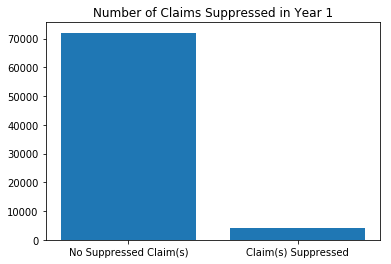

In [8]:
plt.bar(df_target_Y2['ClaimsTruncated'].unique(),df_target_Y2['ClaimsTruncated'].value_counts(dropna=False))
plt.title('Number of Claims Suppressed in Year 1')
plt.xticks([0,1],['No Suppressed Claim(s)','Claim(s) Suppressed']);

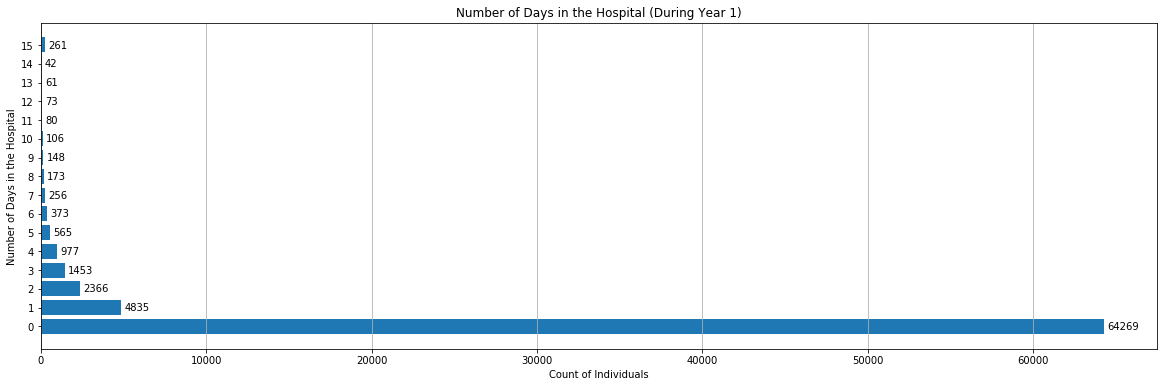

In [9]:
days = df_target_Y2['DaysInHospital'].unique()
days.sort()
inds = df_target_Y2['DaysInHospital'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,6))
plt.barh(days,inds)
plt.grid(b=None, which='major', axis='x')
for d in days:
    plt.text(inds[d]+200, d, str(inds[d]), color='black', va='center')
plt.yticks(range(0,16),range(0,16))
plt.ylabel('Number of Days in the Hospital')
plt.xlabel('Count of Individuals')
plt.title('Number of Days in the Hospital (During Year 1)');

#### TASK:  The 0 value records distort the scale.  Present the visualization in log scale.

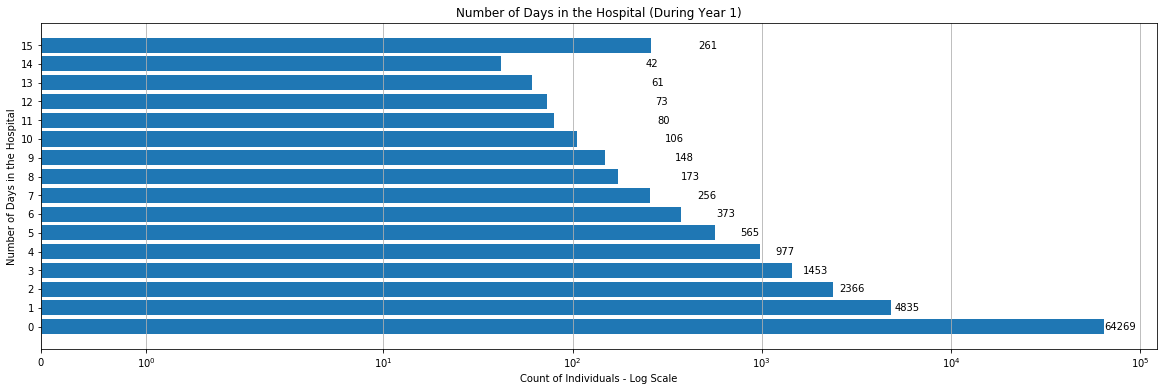

In [10]:
days = df_target_Y2['DaysInHospital'].unique()
days.sort()
inds = df_target_Y2['DaysInHospital'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,6))
plt.barh(days,inds)
plt.grid(b=None, which='major', axis='x')
for d in days:
    plt.text(inds[d]+200, d, str(inds[d]), color='black', va='center')
plt.yticks(range(0,16),range(0,16))
plt.xscale('symlog')
plt.ylabel('Number of Days in the Hospital')
plt.xlabel('Count of Individuals - Log Scale')
plt.title('Number of Days in the Hospital (During Year 1)');

#### TASK: Visualize a cumulative distribution. 

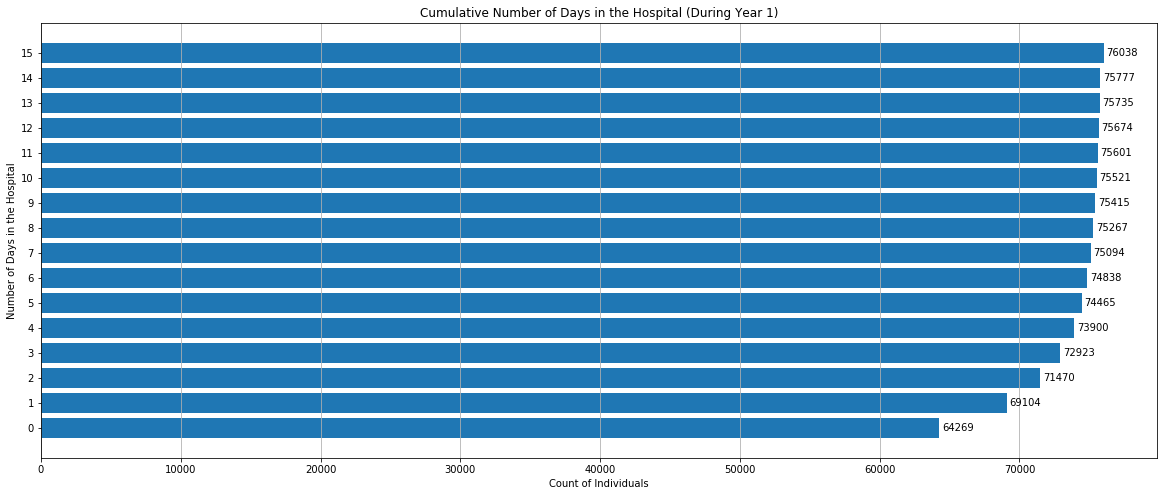

In [11]:
days = df_target_Y2['DaysInHospital'].unique()
days.sort()
inds = df_target_Y2['DaysInHospital'].value_counts(dropna=False).sort_index()
inds = np.cumsum(inds)
plt.figure(figsize=(20,8))
plt.barh(days,inds)
plt.grid(b=None, which='major', axis='x')
for d in days:
    plt.text(inds[d]+200, d, str(inds[d]), color='black', va='center')
plt.yticks(range(0,16),range(0,16))

plt.ylabel('Number of Days in the Hospital')
plt.xlabel('Count of Individuals')
plt.title('Cumulative Number of Days in the Hospital (During Year 1)');

#### Adding feature to reflect the year of service associated with ClaimsTruncated feature
Remember, DaysInHospital is our target. We will be dropping this. Year of service for ClaimsTruncated is the year prior to the target data, which we will reflect in our Year feature. This feature will allow us to retain knowledge of the source table (Y2, Y3, etc.) after we merge these together.

In [12]:
# Calculate a log target for days in the hospital

df_target_Y2['label'] = np.log(df_target_Y2['DaysInHospital'] + 1)
df_target_Y3['label'] = np.log(df_target_Y3['DaysInHospital'] + 1)

# Add column for year of the associated claims 
df_target_Y2['Year'] = 'Y1'
df_target_Y3['Year'] = 'Y2'



In [13]:
df_target_Y2['label']

0        0.000000
1        0.000000
2        0.693147
3        0.693147
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
11       0.000000
12       0.000000
13       0.000000
14       0.000000
15       0.000000
16       0.000000
17       0.000000
18       0.000000
19       0.000000
20       0.000000
21       0.693147
22       0.000000
23       0.000000
24       0.000000
25       0.000000
26       0.693147
27       0.000000
28       0.000000
29       0.000000
           ...   
76008    0.000000
76009    0.000000
76010    1.609438
76011    0.000000
76012    0.000000
76013    0.000000
76014    0.000000
76015    0.000000
76016    0.000000
76017    0.000000
76018    0.000000
76019    0.000000
76020    0.000000
76021    0.000000
76022    0.000000
76023    0.000000
76024    2.197225
76025    0.000000
76026    0.000000
76027    0.000000
76028    0.000000
76029    0.000000
76030    0.000000
76031    0.000000
76032    1

### Second Table: Claims Data

In [14]:
df_claims = load_data(os.path.join(DATA_DIR, 'Claims.csv'), 'claims')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
MemberID                 int64
ProviderID               float64
Vendor                   float64
PCP                      float64
Year                     object
Specialty                object
PlaceSvc                 object
PayDelay                 object
LengthOfStay             object
DSFS                     object
PrimaryConditionGroup    object
CharlsonIndex            object
ProcedureGroup           object
SupLOS                   int64
dtypes: float64(3), int64(2), object(9)
memory usage: 285.1+ MB
None


,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0


In [15]:
# payment delay values are all integers except 162+ (where value is capped)
df_claims['PayDelay'].value_counts()[:10]

0       141451
162+    92592 
28      87286 
23      85165 
29      83899 
22      83380 
24      82660 
30      78784 
21      78751 
31      73889 
Name: PayDelay, dtype: int64

#### Convert 162+ to numeric value so we can treat this feature as numeric (integer) instead of categorical

In [16]:
df_claims['PayDelay'] = np.where(df_claims['PayDelay']=='162+', 162, df_claims['PayDelay'])
df_claims['PayDelay'] = df_claims['PayDelay'].astype(int)

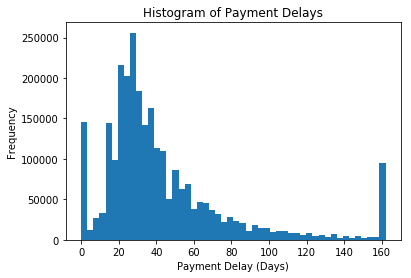

In [17]:
plt.hist(df_claims['PayDelay'].values, bins=50)
plt.title('Histogram of Payment Delays')
plt.xlabel('Payment Delay (Days)')
plt.ylabel('Frequency');

#### We can join claims and DaysInHospital tables to visualize how each facet of these features relates to our target

In [18]:
# inner join of df_claims and df_target_Y2
merged = pd.merge(left=df_claims, right=df_target_Y2, left_on='MemberID', right_on='MemberID')

In [19]:
merged.columns

Index(['MemberID', 'ProviderID', 'Vendor', 'PCP', 'Year_x', 'Specialty',
       'PlaceSvc', 'PayDelay', 'LengthOfStay', 'DSFS', 'PrimaryConditionGroup',
       'CharlsonIndex', 'ProcedureGroup', 'SupLOS', 'ClaimsTruncated',
       'DaysInHospital', 'label', 'Year_y'],
      dtype='object')

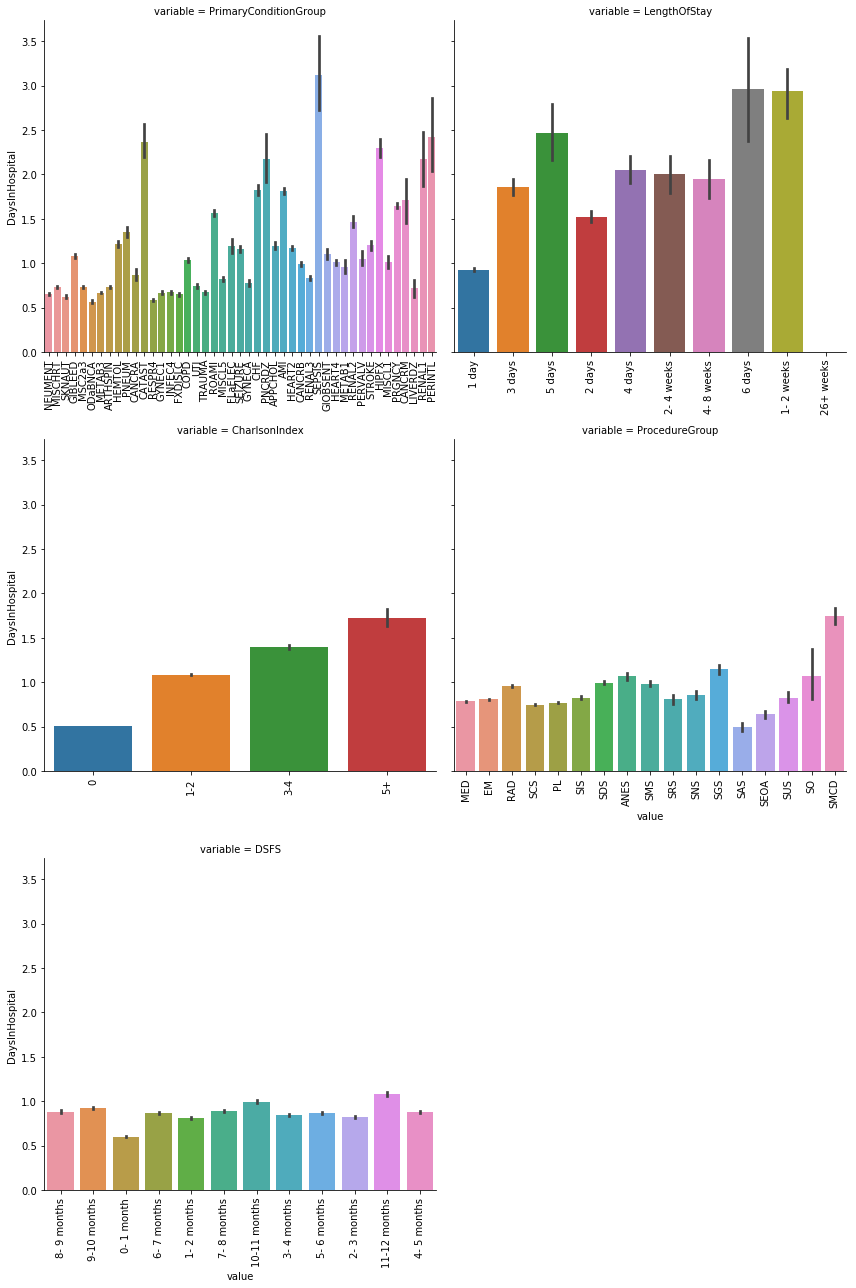

In [20]:
# evaluate how facets of each feature relate to number of days in hospital
def plot(x,y,**kwargs):
    sns.barplot(x,y)
    plt.xticks(rotation='vertical')
    plt.figure(figsize = (6,3))

cat_vars = ['PrimaryConditionGroup','LengthOfStay','CharlsonIndex','ProcedureGroup', 'DSFS']
df = pd.melt(merged,id_vars='DaysInHospital', value_vars=cat_vars)
grid = sns.FacetGrid(df, col='variable', col_wrap=2, sharex=False, sharey=True, size = 6)
grid = grid.map(plot, 'value', 'DaysInHospital');

#### TASK: Are there similar insights you can identify by exploring the value_counts of other claims features?

In [21]:
# payment delay values are all integers except 162+ (where value is capped)
df_claims['DSFS'].value_counts()[:10]

0- 1 month     707721
1- 2 months    247343
2- 3 months    225216
3- 4 months    212214
5- 6 months    192000
4- 5 months    189001
6- 7 months    180662
7- 8 months    175191
8- 9 months    171878
9-10 months    151527
Name: DSFS, dtype: int64

In [22]:
# payment delay values are all integers except 162+ (where value is capped)
df_claims['LengthOfStay'].value_counts()[:10]

1 day         56696
2 days        6485 
3 days        3246 
4 days        1473 
1- 2 weeks    1143 
2- 4 weeks    961  
4- 8 weeks    903  
5 days        510  
6 days        179  
26+ weeks     2    
Name: LengthOfStay, dtype: int64

In [23]:
# payment delay values are all integers except 162+ (where value is capped)
df_claims['CharlsonIndex'].value_counts()[:10]

0      1356995
1-2    1256527
3-4    49479  
5+     5989   
Name: CharlsonIndex, dtype: int64

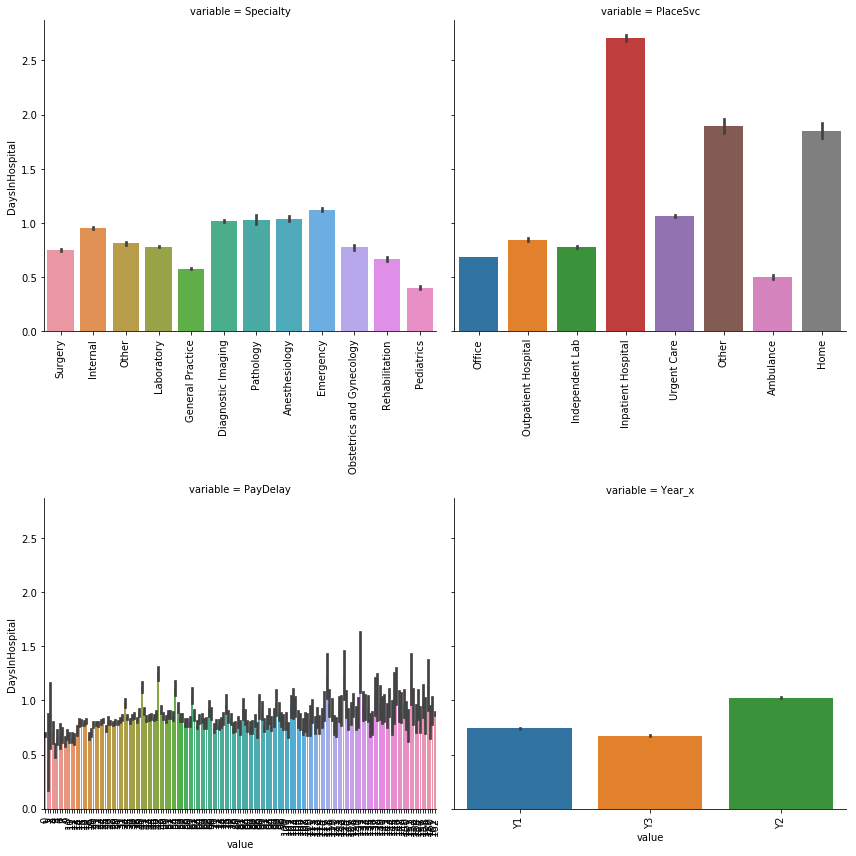

In [24]:
# Additional features evaluation relating to number of days in hospital
def plot(x,y,**kwargs):
    sns.barplot(x,y)
    plt.xticks(rotation='vertical')
    plt.figure(figsize = (6,3))
cat_vars = ['Specialty','PlaceSvc','PayDelay','Year_x']
df = pd.melt(merged,id_vars='DaysInHospital', value_vars=cat_vars)
grid = sns.FacetGrid(df, col='variable', col_wrap=2, sharex=False, sharey=True, size = 6)
grid = grid.map(plot, 'value', 'DaysInHospital');

In [25]:
df_claims['Specialty'].value_counts()[:10]

Internal                     672059
Laboratory                   653188
General Practice             473655
Surgery                      208217
Diagnostic Imaging           207297
Emergency                    126130
Other                        92687 
Pediatrics                   84862 
Rehabilitation               57554 
Obstetrics and Gynecology    36594 
Name: Specialty, dtype: int64

In [26]:
df_claims['PlaceSvc'].value_counts()[:10]

Office                 1542007
Independent Lab        657750 
Urgent Care            199528 
Outpatient Hospital    121528 
Inpatient Hospital     85776  
Ambulance              34766  
Other                  11700  
Home                   8303   
Name: PlaceSvc, dtype: int64

In [27]:
df_claims['PayDelay'].value_counts()[:10]

0      141451
162    92592 
28     87286 
23     85165 
29     83899 
22     83380 
24     82660 
30     78784 
21     78751 
31     73889 
Name: PayDelay, dtype: int64

In [28]:
df_claims['Year'].value_counts()[:10]

Y3    904429
Y2    898872
Y1    865689
Name: Year, dtype: int64

In [29]:
merged.groupby(['Specialty','Year_x'])['DaysInHospital'].sum().round(3).unstack().sort_values('Y1', ascending=False)

Year_x,Y1,Y2,Y3
Specialty,,,
Internal,178033,235962,130740
Laboratory,160273,167284,116509
General Practice,98204,74931,55399
Diagnostic Imaging,55295,87201,36032
Surgery,49791,53004,32794
Emergency,37555,57872,19659
Other,23869,20872,20589
Rehabilitation,10792,13200,8183
Obstetrics and Gynecology,8123,10381,3759


We notice from the above table that people spend more days in the hospital in specialities like Internal Medicine and Laboratory which makes sense as these are the most common symptoms.

#### Build transformation functions to perform feature engineering on claims data

Examples might include converting ordinal categories to numerical approximations or aggregating existing features to create additional features. Following is an example to perform these transformations in a pipeline.

In [30]:
# # Convert categorical features to numerical approximations (via pipeline)
# class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X, y=None): 
#         charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
#         los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
#           '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
#         X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else 162)
#         X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
#         X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
#         X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
#         return X

In [31]:
# # Create aggregate features (via pipeline)
# class ClaimAggregater(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X, y=None):
#         agg_op_dt_claim = {
#             'PayDelay': {
#                 'max_PayDelay': 'max',
#                 'min_PayDelay': 'min',
#                 'avg_PayDelay': 'mean'
              
#             },
#             'LengthOfStay': {
#                 'max_LOS': 'max',
#                 'min_LOS': 'min',
#                 'avg_LOS': 'mean'
             
#             },
#             'DSFS': {
#                 'max_dsfs': 'max',
#                 'min_dsfs': 'min',
#                 'avg_dsfs': 'mean'
               
#             },
#             'CharlsonIndex': {
#                 'max_CharlsonIndex': 'max',
#                 'min_CharlsonIndex': 'min',
#                 'avg_CharlsonIndex': 'mean'
               
#             }
                   
#         }

#         result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_claim)
#         result.columns = result.columns.droplevel()
#         result = result.reset_index(level=['Year', 'MemberID'])
#         result['range_dsfs'] = result['max_dsfs'] - result['min_dsfs']
#         result['range_CharlsonIndex'] = result['max_CharlsonIndex'] - result['min_CharlsonIndex']
#         return result

#### TASK: Are there additional features you can engineer? 
The example provided is only an example. You can do better! Ideally, additional features should add insight that is not already present in the data.

In [32]:
# Additional feature engineering
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        PCG_dt = pd.read_csv('Lookup PrimaryConditionGroup.csv').set_index('PrimaryConditionGroup')['Description'].to_dict()
        PG_dt = pd.read_csv('Lookup ProcedureGroup.csv').set_index('ProcedureGroup')['Description'].to_dict()
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else 162)
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: 0 if pd.isnull(x) else los_dt[x])
        X['Specialty'] = X['Specialty'].apply(lambda x: None if pd.isnull(x) else x)
        X['PlaceSvc'] = X['PlaceSvc'].apply(lambda x: None if pd.isnull(x) else x)
        X['PrimaryConditionGroup'] = X['PrimaryConditionGroup'].apply(lambda x: None if pd.isnull(x) else PCG_dt[x])
        X['ProcedureGroup'] = X['ProcedureGroup'].apply(lambda x: None if pd.isnull(x) else PG_dt[x])
        
        return X

In [33]:
# Create aggregate features (via pipeline)
class ClaimAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        agg_op_dt_claim = {
            'PayDelay': {
                'max_PayDelay': 'max',
                'min_PayDelay': 'min',
                'avg_PayDelay': 'mean'
               
            },
            'LengthOfStay': {
                'max_LOS': 'max',
                'min_LOS': 'min',
                'avg_LOS': 'mean'
               
            },
            'DSFS': {
                'max_dsfs': 'max',
                'min_dsfs': 'min',
                'avg_dsfs': 'mean'
               
            },
            'CharlsonIndex': {
                'max_CharlsonIndex': 'max',
                'min_CharlsonIndex': 'min',
                'avg_CharlsonIndex': 'mean'
                
            },
            'MemberID' : {
                'claim_count' : 'count'
            },
            'ProviderID': {
                'provider_count' : 'nunique'
            },
            'Vendor' : {
                'vendor_count' : 'nunique'
            },
            'PCP' : {
                'PCP_count' : 'nunique'
            },
            'Specialty': {
                'Specialty_count' : 'nunique'
            },
            'PlaceSvc': {
                'PlacSvc_count': 'nunique'
            },
            'PrimaryConditionGroup':{
                'PriCondGrp_count' : 'nunique'
            },
            'ProcedureGroup': {
                'ProcedureGrp_count' : 'nunique'
            }
            
            
        }

        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_claim)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        result['range_dsfs'] = result['max_dsfs'] - result['min_dsfs']
        result['range_CharlsonIndex'] = result['max_CharlsonIndex'] - result['min_CharlsonIndex']
        return result

### Highlight 1:  Feature Engineering & EDA 
##### The following new features were added to our analysis:
##### 1. MemberID Count
##### 2. ProviderID UniqueCount
##### 3. Vendor UniqueCount
##### 4. PlaceSvc UniqueCount
##### 5. PrimaryConditionGroup UniqueCount
##### 6. ProcedureGroup UniqueCount

##### These metrics have provided valuable insights in our analysis of the target variable Days in Hospital.  In the feature importances analysis we notice that some of these features have an influence on the target variable.

##### On the EDA, we have shown through graphical analysis of how some of the categorical features such as Place of Service, Primary condition group have an influence on the days-in-hospital target variable.  This insight supports our addition of the related features such as PlaceSvc count, primany condition group count and procedure group count variables.


In [34]:
claims_pipeline = Pipeline([
    ('claims_adder', ClaimAttributesAdder()),
    ('claims_aggregater', ClaimAggregater())
    ])
df_claims_aggregated = claims_pipeline.transform(load_data(os.path.join(DATA_DIR, 'Claims.csv'), 'claims'))
df_claims_aggregated.head()
# # Additional categorical columns to transform to OHE
# cols_to_transform = ['Specialty']
# df_claims_aggregated = pd.get_dummies(df_claims_aggregated, columns = cols_to_transform)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
MemberID                 int64
ProviderID               float64
Vendor                   float64
PCP                      float64
Year                     object
Specialty                object
PlaceSvc                 object
PayDelay                 object
LengthOfStay             object
DSFS                     object
PrimaryConditionGroup    object
CharlsonIndex            object
ProcedureGroup           object
SupLOS                   int64
dtypes: float64(3), int64(2), object(9)
memory usage: 285.1+ MB
None


,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0


,Year,MemberID,max_PayDelay,min_PayDelay,avg_PayDelay,max_LOS,min_LOS,avg_LOS,max_dsfs,min_dsfs,...,claim_count,provider_count,vendor_count,PCP_count,Specialty_count,PlacSvc_count,PriCondGrp_count,ProcedureGrp_count,range_dsfs,range_CharlsonIndex
0,Y1,210,162,22,90.000000,2,0,0.250000,10.0,1.0,...,8,4,4,2,3,3,4,5,9.0,0
1,Y1,3197,162,36,98.400000,0,0,0.000000,6.0,1.0,...,5,3,3,1,2,2,2,2,5.0,0
2,Y1,3889,162,33,70.692308,2,0,0.230769,2.0,1.0,...,13,7,7,1,4,3,5,5,1.0,2
3,Y1,4187,162,29,85.000000,0,0,0.000000,9.0,1.0,...,4,3,3,1,3,1,3,2,8.0,0
4,Y1,9063,68,39,60.250000,0,0,0.000000,2.0,1.0,...,4,2,2,1,2,1,1,2,1.0,0


In [35]:
df_claims_aggregated.isnull().any()

Year                   False
MemberID               False
max_PayDelay           False
min_PayDelay           False
avg_PayDelay           False
max_LOS                False
min_LOS                False
avg_LOS                False
max_dsfs               True 
min_dsfs               True 
avg_dsfs               True 
max_CharlsonIndex      False
min_CharlsonIndex      False
avg_CharlsonIndex      False
claim_count            False
provider_count         False
vendor_count           False
PCP_count              False
Specialty_count        False
PlacSvc_count          False
PriCondGrp_count       False
ProcedureGrp_count     False
range_dsfs             True 
range_CharlsonIndex    False
dtype: bool

Aggregated Metrics like MemberID count, unique count of providers, vendors, PCP, Place of Service & procedure group will provide valuable statistical insight like mean number of claims by member, vendor and length of stay in the hospital.  

In [36]:
adder = ClaimAttributesAdder()
df_claims_attr = adder.fit_transform(load_data(os.path.join(DATA_DIR, 'Claims.csv'), 'claims'))
df_claims_attr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
MemberID                 int64
ProviderID               float64
Vendor                   float64
PCP                      float64
Year                     object
Specialty                object
PlaceSvc                 object
PayDelay                 object
LengthOfStay             object
DSFS                     object
PrimaryConditionGroup    object
CharlsonIndex            object
ProcedureGroup           object
SupLOS                   int64
dtypes: float64(3), int64(2), object(9)
memory usage: 285.1+ MB
None


,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0


,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,0,9.0,Other neurological,0,Medicine,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,0,8.0,Other neurological,2,Evaluation and Management,0
2,2759427,2997752.0,140343.0,91972.0,Y3,Internal,Office,14,0,1.0,Other metabolic,0,Evaluation and Management,0
3,73570559,7053364.0,240043.0,70119.0,Y3,Laboratory,Independent Lab,24,0,6.0,Other metabolic,2,Surgery-Cardiovascular System,0
4,11837054,7557061.0,496247.0,68968.0,Y2,Surgery,Outpatient Hospital,27,0,5.0,Fractures and dislocations,2,Evaluation and Management,0


In [37]:
# Distribution of claims by Specialty

spl = df_claims_attr.groupby(['Specialty']).size().sort_values(ascending = False)
spl

Specialty
Internal                     672059
Laboratory                   653188
General Practice             473655
Surgery                      208217
Diagnostic Imaging           207297
Emergency                    126130
Other                        92687 
Pediatrics                   84862 
Rehabilitation               57554 
Obstetrics and Gynecology    36594 
Anesthesiology               33435 
Pathology                    14907 
dtype: int64

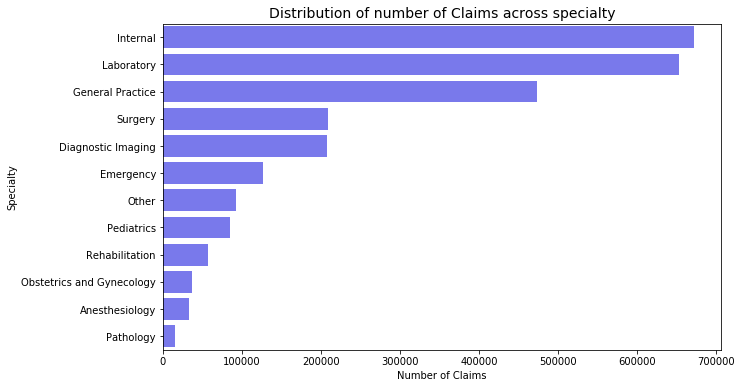

In [38]:
df = pd.DataFrame(data = {"specialty":spl.index, "count":spl.values})

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(y = 'specialty', x = 'count', data = df, color = 'blue', alpha=.6)
ax.set(xlabel = 'Number of Claims', ylabel = 'Specialty')
plt.title("Distribution of number of Claims across specialty",fontsize=14)

plt.show()

Inference : We see from the chart above that the claims by speciality is skewed distribution with some specialties like Internal
Laboratory, General Practice taking over 70% of the claims. This makes sense as mostly people visit hospital for general diagnosis and doctor recommended lab tests.  However, GP visits are an opportunity for increased preventative care, which may also provide a chance to reduce hospital days.  

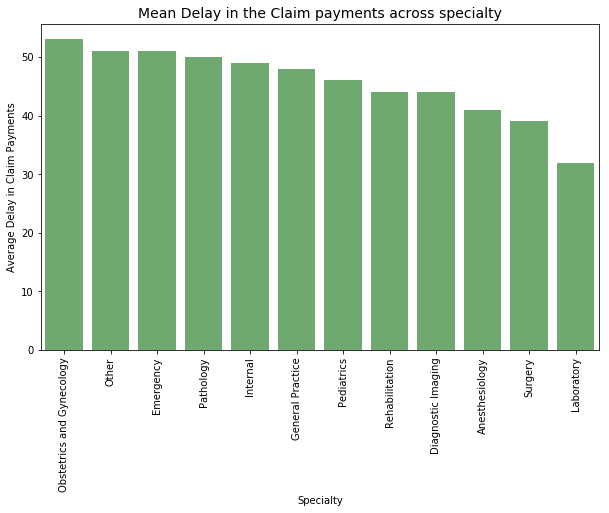

In [39]:
Avg_delay = pd.DataFrame(df_claims_attr.groupby('Specialty')['PayDelay'].mean().round(0).fillna(0).sort_values(ascending=False)).reset_index()

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x = 'Specialty', y = 'PayDelay', data=Avg_delay,  color = 'green', alpha=.6)
ax.set(xlabel = 'Specialty', ylabel = 'Average Delay in Claim Payments')
plt.xticks(rotation=90)
plt.title("Mean Delay in the Claim payments across specialty",fontsize=14)

plt.show()


The mean days delay in claim payments is the highest in Obstetrics and Gynecology even though the number of claims (36594) is significantly lower for this specialty (Refer previous chart).  This may be due to the complexity and high value of the claims in O&G.

### Third Table: Drug Data

In [40]:
df_drug_count = load_data(os.path.join(DATA_DIR, 'DrugCount.csv'), 'drug_count')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818241 entries, 0 to 818240
Data columns (total 4 columns):
MemberID     818241 non-null int64
Year         818241 non-null object
DSFS         818241 non-null object
DrugCount    818241 non-null object
dtypes: int64(1), object(3)
memory usage: 25.0+ MB
None


,MemberID,Year,DSFS,DrugCount
0,48925661,Y2,9-10 months,7+
1,90764620,Y3,8- 9 months,3


#### Perform similar feature transformations for drug data

In [41]:
df_drug_count['DrugCount'].value_counts(dropna=False)

1     263501
2     188559
3     129881
4     87783 
5     57768 
7+    54018 
6     36731 
Name: DrugCount, dtype: int64

In [42]:
df_drug_count['DSFS'].value_counts(dropna=False)

0- 1 month      108980
1- 2 months     81395 
2- 3 months     78528 
3- 4 months     77044 
4- 5 months     73325 
5- 6 months     72274 
6- 7 months     69350 
7- 8 months     67433 
8- 9 months     62700 
9-10 months     55984 
10-11 months    46184 
11-12 months    25044 
Name: DSFS, dtype: int64

In [43]:
# preprocess via pipeline
class DrugAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):  
        dsfs_dt = {'0- 1 month': 15, '1- 2 months': 45, '2- 3 months': 75, '3- 4 months': 105, 
                   '4- 5 months': 135, '5- 6 months': 165, '6- 7 months': 195, '7- 8 months': 225, 
                   '8- 9 months': 255, '9-10 months': 285, '10-11 months': 315, '11-12 months': 345}
        X['DSFS'] = X['DSFS'].apply(lambda x: dsfs_dt[x])
        X['DrugCount'] = X['DrugCount'].apply(lambda x: 7 if x == '7+' else int(x))
        return X

In [44]:
agg_op_dt_drug = {
    'DrugCount': {
        'max_DrugCount': 'max',
        'min_DrugCount': 'min',
        'avg_DrugCount': 'mean',
        'months_DrugCount': 'count'
    }
}



In [45]:
# aggregate by MemberID and year (via pipeline)
class DrugAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        agg_op_dt_drug = {
            'DrugCount': {
                'max_DrugCount': 'max',
                'min_DrugCount': 'min',
                'avg_DrugCount': 'mean',
                'months_DrugCount': 'count'
               
            }
        }
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_drug)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        return result

In [46]:
df_drug_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818241 entries, 0 to 818240
Data columns (total 4 columns):
MemberID     818241 non-null int64
Year         818241 non-null object
DSFS         818241 non-null object
DrugCount    818241 non-null object
dtypes: int64(1), object(3)
memory usage: 25.0+ MB


In [47]:
drug_pipeline = Pipeline([
    ('drug_adder', DrugAttributesAdder()),
    ('drug_aggregater', DrugAggregater())
    ])
df_drug_count_aggregated = drug_pipeline.transform(df_drug_count)

In [48]:
df_drug_count_aggregated.head()

,Year,MemberID,max_DrugCount,min_DrugCount,avg_DrugCount,months_DrugCount
0,Y1,210,2,1,1.666667,3
1,Y1,3197,2,1,1.250000,4
2,Y1,3889,5,2,3.000000,10
3,Y1,4187,7,3,6.100000,10
4,Y1,9063,1,1,1.000000,2


### Fourth Table: Lab Data

In [49]:
df_lab_count = load_data(os.path.join(DATA_DIR, 'LabCount.csv'), 'lab_count')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361484 entries, 0 to 361483
Data columns (total 4 columns):
MemberID    361484 non-null int64
Year        361484 non-null object
DSFS        361484 non-null object
LabCount    361484 non-null object
dtypes: int64(1), object(3)
memory usage: 11.0+ MB
None


,MemberID,Year,DSFS,LabCount
0,69258001,Y3,2- 3 months,1
1,10143167,Y1,0- 1 month,2


In [50]:
df_lab_count['LabCount'].value_counts(dropna=False)

1      93744
2      54183
3      43472
4      38815
5      34900
6      27705
10+    23110
7      20591
8      14885
9      10079
Name: LabCount, dtype: int64

In [51]:
# preprocess via pipeline
class LabAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dsfs_dt = {'0- 1 month': 15, '1- 2 months': 45, '2- 3 months': 75, '3- 4 months': 105, 
           '4- 5 months': 135, '5- 6 months': 165, '6- 7 months': 195, '7- 8 months': 225, 
           '8- 9 months': 255, '9-10 months': 285, '10-11 months': 315, '11-12 months': 345}
        X['DSFS'] = X['DSFS'].apply(lambda x: dsfs_dt[x])
        X['LabCountI'] = X['LabCount'].apply(lambda x: 10 if x == '10+' else int(x))
        return X

In [52]:
# Aggregate via pipeline
class LabAggregater(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        agg_op_dt_lab = {
            'LabCountI': {
                'max_LabCount': 'max',
                'min_LabCount': 'min',
                'avg_LabCount': 'mean',
                'months_LabCount': 'count'
            }
        }
        result = X.groupby(['Year', 'MemberID']).agg(agg_op_dt_lab)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=['Year', 'MemberID'])
        return result

In [53]:
lab_pipeline = Pipeline([
    ('lab_adder', LabAttributesAdder()),
    ('lab_aggregater', LabAggregater())
    ])
df_lab_count_aggregated = lab_pipeline.transform(df_lab_count)

In [54]:
df_lab_count_aggregated.tail()

,Year,MemberID,max_LabCount,min_LabCount,avg_LabCount,months_LabCount
154929,Y3,99982956,1,1,1.0,1
154930,Y3,99987030,10,10,10.0,1
154931,Y3,99992565,10,10,10.0,1
154932,Y3,99993334,3,3,3.0,1
154933,Y3,99995391,4,1,2.0,4


### Fifth Table: Members Data

In [55]:
df_members = load_data(os.path.join(DATA_DIR, 'Members.csv'), 'members')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113000 entries, 0 to 112999
Data columns (total 3 columns):
MemberID           113000 non-null int64
AgeAtFirstClaim    107247 non-null object
Sex                95448 non-null object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB
None


,MemberID,AgeAtFirstClaim,Sex
0,14723353,70-79,M
1,75706636,70-79,M


In [56]:
df_members['AgeAtFirstClaim'].value_counts(dropna=False)

40-49    16111
70-79    14514
50-59    13329
60-69    12622
30-39    12435
10-19    11319
0-9      10791
20-29    8505 
80+      7621 
NaN      5753 
Name: AgeAtFirstClaim, dtype: int64

In [57]:
# separate AgeAtFirstClaim and Sex features for separate pre-processing
df_members_age = df_members.drop('Sex',axis=1)
df_members_sex = pd.DataFrame(df_members['Sex'],columns=['Sex'])

In [58]:
# convert 'AgeAtFirstClaim' to numerical approximation
class MemberAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        age_dt = {'40-49': 45, '70-79': 75, '50-59': 55, '60-69': 65, '30-39': 35,
          '10-19': 15, '0-9': 5, '20-29': 25, '80+': 85}
        X['AgeAtFirstClaim'] = X['AgeAtFirstClaim'].apply(lambda x: None if pd.isnull(x) else age_dt[x])
        return X
    
adder = MemberAttributesAdder()
df_members = adder.fit_transform(df_members_age)

#### There are a lot of NaN values in the 'Sex' feature. One approach is to handle this through the One Hot Encoding process.

In [59]:
df_members_sex['Sex'].value_counts(dropna=False)

F      51482
M      43966
NaN    17552
Name: Sex, dtype: int64

In [60]:
# convert 'Sex' feature to numerical and OHE to account for NaN values (i.e., F=0, M=0)
class MemberLabelEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X['Sex'] = np.where(X['Sex'].isnull(),'NaN',X['Sex'])
        self.le = LabelEncoder()
        self.le.fit(X['Sex'])
        self.classes = self.le.classes_
        return self
    def transform(self, X, y=None): 
        X['Sex'] = np.where(X['Sex'].isnull(),'NaN',X['Sex'])
        X['Sex'] = self.le.transform(X['Sex'])
        return X

class DropOneColumn(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        classes = member_cat_pipeline.named_steps.encoder.classes
        X = pd.DataFrame(X[:,:2], columns=classes[:2])
        return X
    
member_cat_pipeline = Pipeline([('encoder', MemberLabelEncoder()),
                                ('ohe', OneHotEncoder(sparse=False)),
                                ('dropcol', DropOneColumn())
                               ])
df_members_sex = member_cat_pipeline.fit_transform(df_members_sex)

In [61]:
# rejoin Age and Sex columns
df_members[['F','M']] = df_members_sex

In [62]:
df_members.head()

,MemberID,AgeAtFirstClaim,F,M
0,14723353,75.0,0.0,1.0
1,75706636,75.0,0.0,1.0
2,17320609,75.0,0.0,1.0
3,69690888,45.0,0.0,1.0
4,33004608,5.0,0.0,1.0


## Merge Data
We have been processing each table separately to this point. Now we will combine all of our data into one dataset (df_merged). 

In [65]:
# 1. Union Target DataFrames Across Years
df_merged = pd.concat([df_target_Y2, df_target_Y3])

# 2. Join/Merge in Members Data
df_merged = df_merged.merge(df_members, how='left', on='MemberID')

# 3. Join/Merge in Aggregated Claims Data
df_merged = df_merged.merge(df_claims_aggregated, how='left', on=['MemberID', 'Year'])

# 4. Join/Merge in Aggregated Drug Data
df_merged = df_merged.merge(df_drug_count_aggregated, how='left', on=['MemberID', 'Year'])

# 5. Join/Merge in Aggregated Lab Data
df_merged = df_merged.merge(df_lab_count_aggregated, how='left', on=['MemberID', 'Year'])


In [66]:
df_merged.shape

(147473, 38)

In [67]:
# drop columns we will not be using for analysis
df_final = df_merged.drop(['MemberID', 'DaysInHospital', 'Year'], axis=1)
df_final.shape

(147473, 35)

In [68]:
#  'label' is our log-transformed target. we will need to separate this out before we build our model.
df_final.describe()

,ClaimsTruncated,label,AgeAtFirstClaim,F,M,max_PayDelay,min_PayDelay,avg_PayDelay,max_LOS,min_LOS,...,range_dsfs,range_CharlsonIndex,max_DrugCount,min_DrugCount,avg_DrugCount,months_DrugCount,max_LabCount,min_LabCount,avg_LabCount,months_LabCount
count,147473.000000,147473.000000,138310.000000,147473.000000,147473.000000,147473.000000,147473.000000,147473.000000,147473.000000,147473.000000,...,147438.000000,147473.000000,96050.000000,96050.000000,96050.000000,96050.000000,104495.000000,104495.000000,104495.000000,104495.000000
mean,0.054349,0.182392,48.505603,0.446678,0.362907,95.766052,26.417656,49.888836,0.336102,0.001309,...,4.813603,0.411018,3.363634,1.472514,2.324470,5.805789,5.387559,3.075382,4.107661,2.321432
std,0.226706,0.481542,24.694340,0.497150,0.480840,50.793495,21.878753,24.346534,1.558397,0.067340,...,3.563016,0.889322,1.977500,0.957139,1.339462,3.831623,2.851816,2.467759,2.267299,1.870237
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,35.000000,0.000000,0.000000,50.000000,15.000000,33.555556,0.000000,0.000000,...,1.000000,0.000000,2.000000,1.000000,1.250000,2.000000,3.000000,1.000000,2.333333,1.000000
50%,0.000000,0.000000,55.000000,0.000000,0.000000,86.000000,22.000000,45.000000,0.000000,0.000000,...,6.000000,0.000000,3.000000,1.000000,2.000000,5.000000,5.000000,2.000000,4.000000,2.000000
75%,0.000000,0.000000,75.000000,1.000000,1.000000,162.000000,30.000000,60.214286,0.000000,0.000000,...,8.000000,0.000000,5.000000,2.000000,3.000000,9.000000,8.000000,4.000000,5.500000,3.000000
max,1.000000,2.772589,85.000000,1.000000,1.000000,162.000000,162.000000,162.000000,42.000000,21.000000,...,9.000000,6.000000,7.000000,7.000000,7.000000,12.000000,10.000000,10.000000,10.000000,12.000000


# EDA

In [164]:
corr_matrix = df_final.corr()
corr_matrix["label"].sort_values(ascending=False)

label                  1.000000
claim_count            0.211010
provider_count         0.201042
vendor_count           0.196854
PriCondGrp_count       0.196694
max_DrugCount          0.173162
ClaimsTruncated        0.167734
max_CharlsonIndex      0.161397
Specialty_count        0.158181
avg_DrugCount          0.157510
PlacSvc_count          0.156907
avg_CharlsonIndex      0.151023
ProcedureGrp_count     0.146785
AgeAtFirstClaim        0.146692
months_LabCount        0.135606
months_DrugCount       0.135003
max_dsfs               0.128256
range_dsfs             0.127710
range_CharlsonIndex    0.120726
avg_dsfs               0.118638
max_PayDelay           0.111504
min_CharlsonIndex      0.102417
max_LabCount           0.095338
max_LOS                0.084103
min_DrugCount          0.061915
avg_LOS                0.039701
avg_LabCount           0.033287
min_dsfs               0.026244
PCP_count              0.014603
min_LOS                0.000168
avg_PayDelay          -0.004391
min_LabC

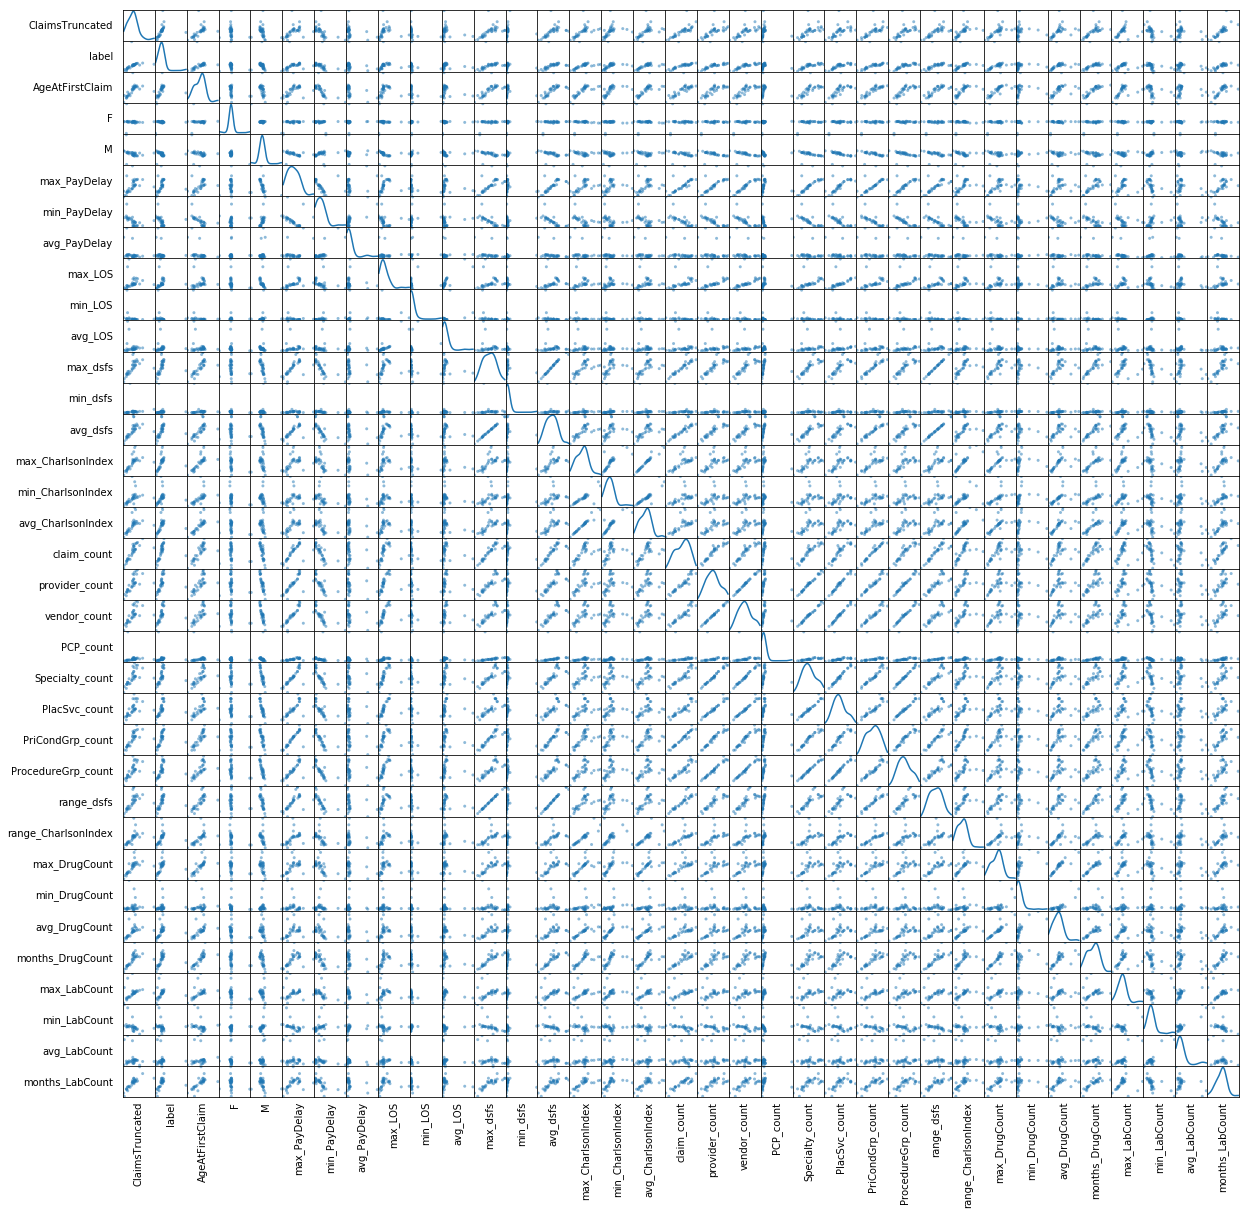

In [67]:
sm = pd.plotting.scatter_matrix(corr_matrix, figsize=(20,20), diagonal='kde')

[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.set_ylabel(s.get_ylabel(), va='center', ha='right', rotation=0, labelpad=10) for s in sm.reshape(-1)]
[s.tick_params(axis='y', which='major', pad=40) for s in sm.reshape(-1)]
[s.set_xticks([]) for s in sm.reshape(-1)]
[s.set_yticks([]) for s in sm.reshape(-1)];

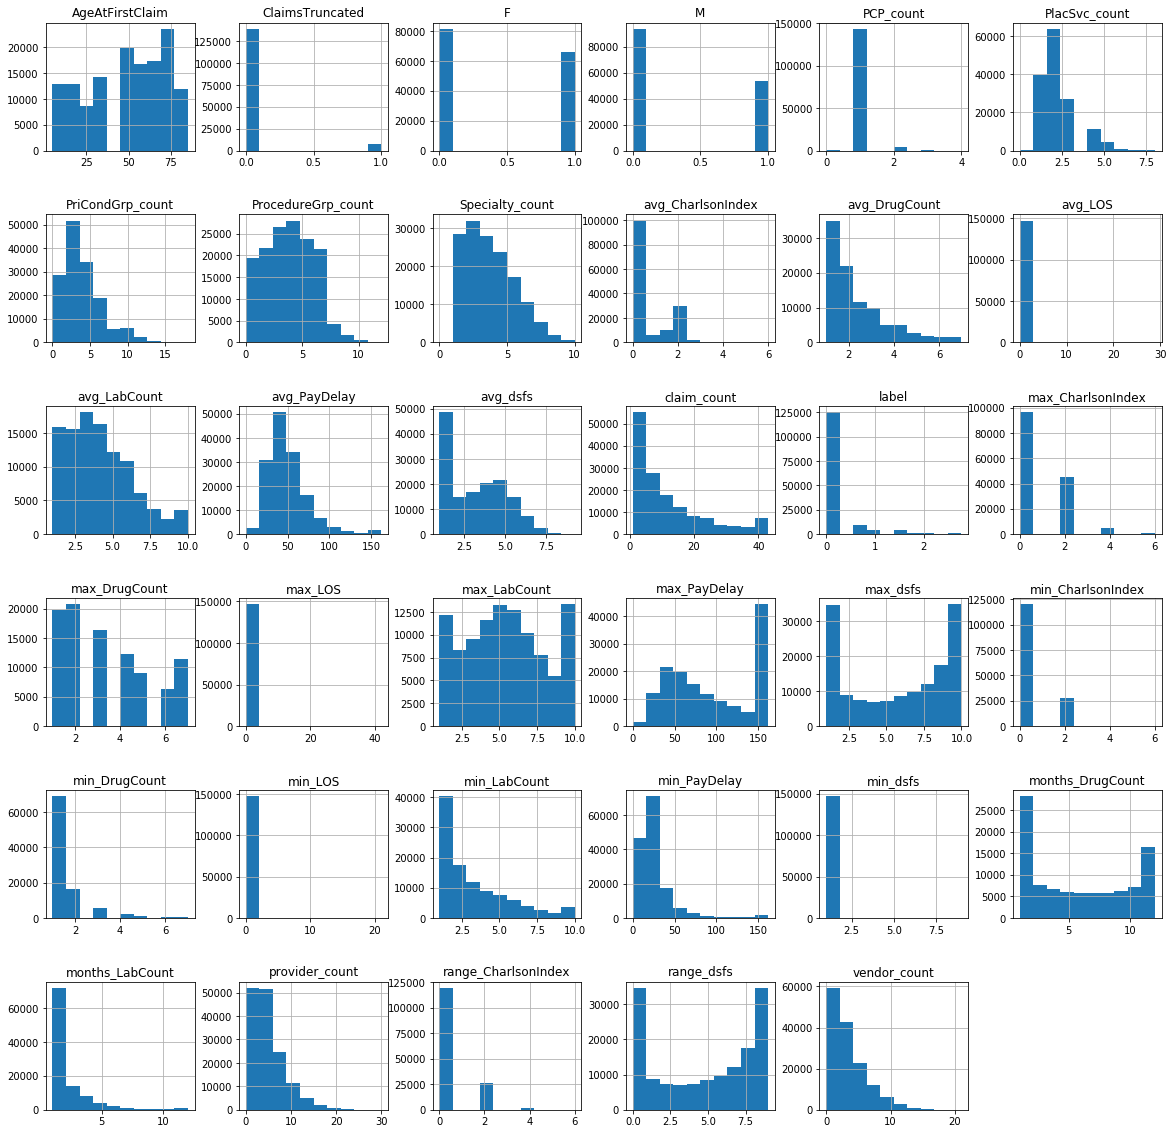

In [68]:
df_final.hist(figsize=(20,20))
plt.subplots_adjust(hspace=.5);

# HHPError  prediction perfromance measure

We will report model performance in terms of the `HHPError` which is defined below.

The [HHP prediction accuracy measure](https://www.heritagehealthprize.com/c/hhp/details/evaluation) is the log root-mean-squared-error (log RMSE) loss function, known as the **HHPError**

\begin{equation}
HHPError = \sqrt{\frac{1}{n}\displaystyle\sum_{i=1}^{n}{[log(p_i + 1) - log(a_i + 1)]\,^2}}
\end{equation}

where 
1.  $i$ is a member;  
2.  $n$ is the total number of members;  
3.  $p_i$ is the predicted number of days spent in the hospital for member $i$ in the test period;  
4.  $a_i$ is the actual number of days spent in the hospital for member $i$ in the test period. 


# Training Pipeline 

In [69]:
# split data into a trainin set (70%), validation set (15%) and blind (holdout) test set (15%)
df_train, df_other = train_test_split(df_final, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_other, test_size=0.5, random_state=42)

In [70]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(103231, 35)
(22121, 35)
(22121, 35)


In [71]:
# separate target data in y variables
y_train = df_train['label']
y_val = df_val['label']
y_test = df_test['label']

In [136]:
df_train.head()

,ClaimsTruncated,label,AgeAtFirstClaim,F,M,max_PayDelay,min_PayDelay,avg_PayDelay,max_LOS,min_LOS,...,Specialty_Rehabilitation,Specialty_Surgery,max_DrugCount,min_DrugCount,avg_DrugCount,months_DrugCount,max_LabCount,min_LabCount,avg_LabCount,months_LabCount
211265,0,0.0,5.0,1.0,0.0,38.0,38.0,38.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.000000,1.0,NaN,NaN,NaN,NaN
416466,0,0.0,75.0,0.0,0.0,162.0,29.0,84.4,1.0,0.0,...,0.0,1.0,1.0,1.0,1.000000,1.0,8.0,1.0,4.666667,3.0
107315,0,0.0,NaN,0.0,1.0,100.0,56.0,81.5,0.0,0.0,...,0.0,0.0,1.0,1.0,1.000000,2.0,3.0,3.0,3.000000,1.0
27459,0,0.0,65.0,1.0,0.0,162.0,30.0,96.0,0.0,0.0,...,0.0,0.0,4.0,1.0,2.142857,7.0,6.0,1.0,3.666667,3.0
164218,0,0.0,35.0,1.0,0.0,53.0,53.0,53.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.666667,12.0,3.0,3.0,3.000000,1.0


In [72]:
# Identify the numeric features we wish to consider (note: we will not include 'label' as this is our target. 
num_attribs = ['ClaimsTruncated', 'AgeAtFirstClaim', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay',
               'min_LOS', 'avg_LOS', 'max_LOS', 'max_dsfs', 'min_dsfs', 'avg_dsfs', 'range_dsfs','max_CharlsonIndex',
               'min_CharlsonIndex', 'avg_CharlsonIndex', 'range_CharlsonIndex', 'max_DrugCount', 
               'min_DrugCount', 'avg_DrugCount', 'months_DrugCount', 'max_LabCount', 'min_LabCount',
               'avg_LabCount', 'months_LabCount','claim_count','provider_count','vendor_count','PCP_count',
               'PlacSvc_count','PriCondGrp_count','ProcedureGrp_count']



# Create a pipeline for the numeric features.
# Missing values will be imputed using the feature median.
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

# Identify the categorical features we wish to consider.
cat_attribs = [
    'F','M'
]

# Identiy the range of expected values for the categorical features.
cat_values = [
    ['Sex_f', 'Sex_male']  # Sex
]

# Create a pipelne for the categorical features.
# Since we already transformed the 'sex' feature in section 2.2.5, we need only select the new OHE features.  
# We have done the label encoding and OHE here as part of our preprocessing pipeline.
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        
    ])

# Union the transformed, scaled numeric and categorical features.
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [70]:
y_train.shape

(103231,)

In [73]:
# Use full processing pipeline to create final X_train, X_val and X_test datasets
X_train = full_pipeline.fit_transform(df_train)
X_val = full_pipeline.transform(df_val)
X_test = full_pipeline.transform(df_test)

In [71]:
X_train.shape

(103231, 33)

## TASK: Extend the pre-processing pipeline to creare a full (end-to-end) ML Pipeline
Can you build a pipeline to include hyperparameter search, cross validation, feature selection, and generate a prediction?

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [73]:
best = SelectKBest(f_regression, k=7) 
X_train_selector = best.fit(X_train, y_train) 
featureScores = X_train_selector.scores_
featureScores

array([  2.88792099e+03,   2.19697332e+03,   5.17310393e+02,
         1.29963330e+03,   2.87595215e+00,   7.24355451e-01,
         2.15394855e+02,   7.35736444e+02,   1.67900624e+03,
         6.64201642e+01,   1.44891854e+03,   1.66511233e+03,
         2.73571278e+03,   1.08329357e+03,   2.38660658e+03,
         1.51091619e+03,   2.67339220e+03,   5.46673917e+02,
         2.27173752e+03,   1.63801094e+03,   8.80146751e+02,
         1.80595078e+00,   1.12565155e+02,   1.72775933e+03,
         4.79423538e+03,   4.31581973e+03,   4.10638261e+03,
         2.54875037e+01,   2.61783975e+03,   4.18531523e+03,
         2.24749613e+03,   2.15849413e+02,   8.35486380e+02])

In [74]:
k=7
tf = TopFeatureSelector(featureScores, k)
tf.fit(X_train)
print(tf.feature_indices_)
X_train[:,tf.feature_indices_]


[ 0 12 16 24 25 26 29]


array([[-0.23840981,  1.0465588 , -1.39520684, ..., -0.72438436,
        -0.66738679, -0.31735573],
       [-0.23840981, -0.67465761, -1.39520684, ...,  0.13487681,
         0.44154549, -0.31735573],
       [-0.23840981,  1.0465588 ,  0.47255343, ...,  1.85339915,
         1.92012186,  0.46781724],
       ..., 
       [-0.23840981,  1.0465588 , -0.15003333, ...,  0.70771759,
         0.0719014 ,  0.07523075],
       [-0.23840981, -0.67465761, -0.77262009, ..., -1.01080475,
        -1.03703088, -1.10252871],
       [-0.23840981, -0.67465761, -0.15003333, ..., -1.01080475,
        -1.03703088, -1.10252871]])

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
best = SelectKBest(f_regression, k=7) 
X_train_selector = best.fit(X_train, y_train) 
featureScores = X_train_selector.scores_
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(featureScores, k)),
    ('lineReg', LinearRegression())
])

prepare_select_and_predict_pipeline.fit(df_train, y_train) 


Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['ClaimsTruncated', 'AgeAtFirstClaim', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay', 'min_LOS', 'avg_LOS', 'max_LOS', 'max_dsfs',...   k=7)), ('lineReg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [76]:
# Model 2 : Prepare Select & Predict Pipeline - Linear Regression 
from sklearn.model_selection import GridSearchCV


param_grid = [
        {'preparation__num_pipeline__imputer__strategy': ['mean', 'median','most_frequent'],
         'feature_selection__k': [28,29,30,31,32,33]
         }
]

grid_search = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error')

grid_search.fit(df_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['ClaimsTruncated', 'AgeAtFirstClaim', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay', 'min_LOS', 'avg_LOS', 'max_LOS', 'max_dsfs',...   k=7)), ('lineReg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'], 'feature_selection__k': [28, 29, 30, 31, 32, 33]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [100]:
grid_search.best_params_

{'feature_selection__k': 32,
 'preparation__num_pipeline__imputer__strategy': 'most_frequent'}

In [78]:
gs_best_est = grid_search.best_estimator_

In [79]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.463237425264 {'feature_selection__k': 28, 'preparation__num_pipeline__imputer__strategy': 'mean'}
0.463133474992 {'feature_selection__k': 28, 'preparation__num_pipeline__imputer__strategy': 'median'}
0.462911252669 {'feature_selection__k': 28, 'preparation__num_pipeline__imputer__strategy': 'most_frequent'}
0.463237433788 {'feature_selection__k': 29, 'preparation__num_pipeline__imputer__strategy': 'mean'}
0.463132829695 {'feature_selection__k': 29, 'preparation__num_pipeline__imputer__strategy': 'median'}
0.462907378457 {'feature_selection__k': 29, 'preparation__num_pipeline__imputer__strategy': 'most_frequent'}
0.463241434855 {'feature_selection__k': 30, 'preparation__num_pipeline__imputer__strategy': 'mean'}
0.463137000354 {'feature_selection__k': 30, 'preparation__num_pipeline__imputer__strategy': 'median'}
0.462910854505 {'feature_selection__k': 30, 'preparation__num_pipeline__imputer__strategy': 'most_frequent'}
0.463202725232 {'feature_selection__k': 31, 'preparation__num_pipel

In [79]:
# Let's refit using the best parameters found in the gridsearch....
grid_search.refit

True

In [80]:
predtrain = grid_search.predict(df_train)

predtrain_rmse = np.sqrt(mean_squared_error(y_train, predtrain))

print(predtrain_rmse)

0.462573487078


In [81]:
predval = grid_search.predict(df_val)

predval_rmse = np.sqrt(mean_squared_error(y_val, predval))

print(predval_rmse)

0.458983007645


In [82]:
# Let's test on the held out dataset

predtest = grid_search.predict(df_test)

predtest_rmse = np.sqrt(mean_squared_error(y_test, predtest))
print(predtest_rmse)

0.46138642493


# Generate predictions using a baseline estimator
As a baseline, we will build a model that predicts Days in Hospital based solely on the average number of days in the hospital for the training data.  We use "negative mean squared error" as the cross validation score. We multiply that by -1 to get the usual "mean squared error" and take the square root to obtain RMSE.

In [83]:
# Model 0 : Baseline 
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy='mean')
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
baseline_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
baseline_train_score = np.sqrt(-baseline_scores.mean())

start = time()
model.fit(X_train, y_train)
baseline_train_predict = model.fit(X_train, y_train)
train_time = np.round(time()-start,3)

start = time()
baseline_test_predict = model.predict(X_val)
baseline_test_score = np.sqrt(mean_squared_error(y_val, baseline_test_predict))
test_time = np.round(time()-start,3)

In [84]:
results = pd.DataFrame(columns=["ExpID", "Train RMSE (Mean)", "Test RMSE", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])
results.loc[0] = ["Baseline Model (Mean)", round(baseline_train_score, 4), round(baseline_test_score, 4), "---", train_time, test_time, "Predict mean of target values"]

In [85]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.0,Predict mean of target values


# Model comparison via statistical significance tests
Build a second model and compare results against baseline using a t-test.

In [93]:
# Model 1: Linear Regression
regressors = [
    ('Linear Regression', LinearRegression()),
]

for idx, (name, regressor) in enumerate(regressors, 1):
    start = time()
    regressor.fit(X_train, y_train)
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    linreg_scores = cross_val_score(regressor, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-linreg_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(X_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, linreg_scores)
    results.loc[len(results)] = [ name, round(train_score, 4), round(test_score, 4), round(p_value, 4), train_time, test_time, 'Default Parameters']

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-123.09, 0.00000)
Machine learning pipeline B is better than A


In [94]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.000,Predict mean of target values
1,Linear Regression,0.4632,0.4592,0,3.661,0.002,Default Parameters


In [102]:
print('\n'.join("{}: {}".format(k, v) for k, v in grid_search.best_params_.items()))
# grid_search.best_params_

feature_selection__k: 32
preparation__num_pipeline__imputer__strategy: most_frequent


In [111]:
regressors = [
     
    ('prepare_select_predict_pipe', gs_best_est) 
]

for idx, (name, regressor) in enumerate(regressors, 1):
    start = time()
    regressor.fit(df_train, y_train)
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    pipe1_scores = cross_val_score(regressor, df_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-pipe1_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(df_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, pipe1_scores)
    results.loc[len(results)] = [ name, round(train_score, 4), round(test_score, 4), round(p_value, 4), train_time, test_time, (', '.join("{}: {}".format(k, v) for k, v in grid_search.best_params_.items()))]

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-121.96, 0.00000)
Machine learning pipeline B is better than A


In [112]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.000,Predict mean of target values
1,Linear Regression,0.4632,0.4592,0,3.661,0.002,Default Parameters
2,prepare_select_predict_pipe,0.4630,0.4590,0,76.802,0.030,"feature_selection__k: 32, preparation__num_pipeline__imputer__strategy: most_frequent"


## Results discussion

Over 30 folds, the simple linear regression with default parameters produced a better model in terms of root mean squared error than the baseline model (mean prediction) . The test accuracy of .46, means the model can predict the number of days a patient will stay in hospital with an error of $e^{.4603^2} - 1 = 0.235$ days. Note that when processing year data, we made log transformation to the `DaysInHospital` variable: `df_target_Y2['label'] = np.log(df_target_Y2['DaysInHospital'] + 1)`.

# Understand your best model and plan further improvements

We can look at the coefficients of our default linear regression model to see how different features are weighted. 

In [197]:
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [198]:
# features sorted by coefficient size
lr_model = dict(zip(num_attribs + cat_attribs, regressor.coef_))
coefs = sorted(lr_model.items(), key=lambda x: np.abs(x[1]), reverse=True)
display(pd.DataFrame(coefs, columns=['Features','Coefficients']))

,Features,Coefficients
0,max_dsfs,-4.297861e+10
1,range_dsfs,4.295890e+10
2,max_CharlsonIndex,2.310255e+10
3,range_CharlsonIndex,-1.771380e+10
4,min_CharlsonIndex,-1.554869e+10
5,min_dsfs,9.727999e+08
6,M,-1.597214e-01
7,F,-1.381338e-01
8,ProcedureGrp_count,-4.041862e-02
9,vendor_count,3.993320e-02


## TASK: Use PCA to identify the most important features.  Try other approaches to feature selection too.

Fitting highly corrolated data in our model, results in overfitting. Two highly corrolated features add no value to the model, hence we have to drop the one that has more corrolation with the other.

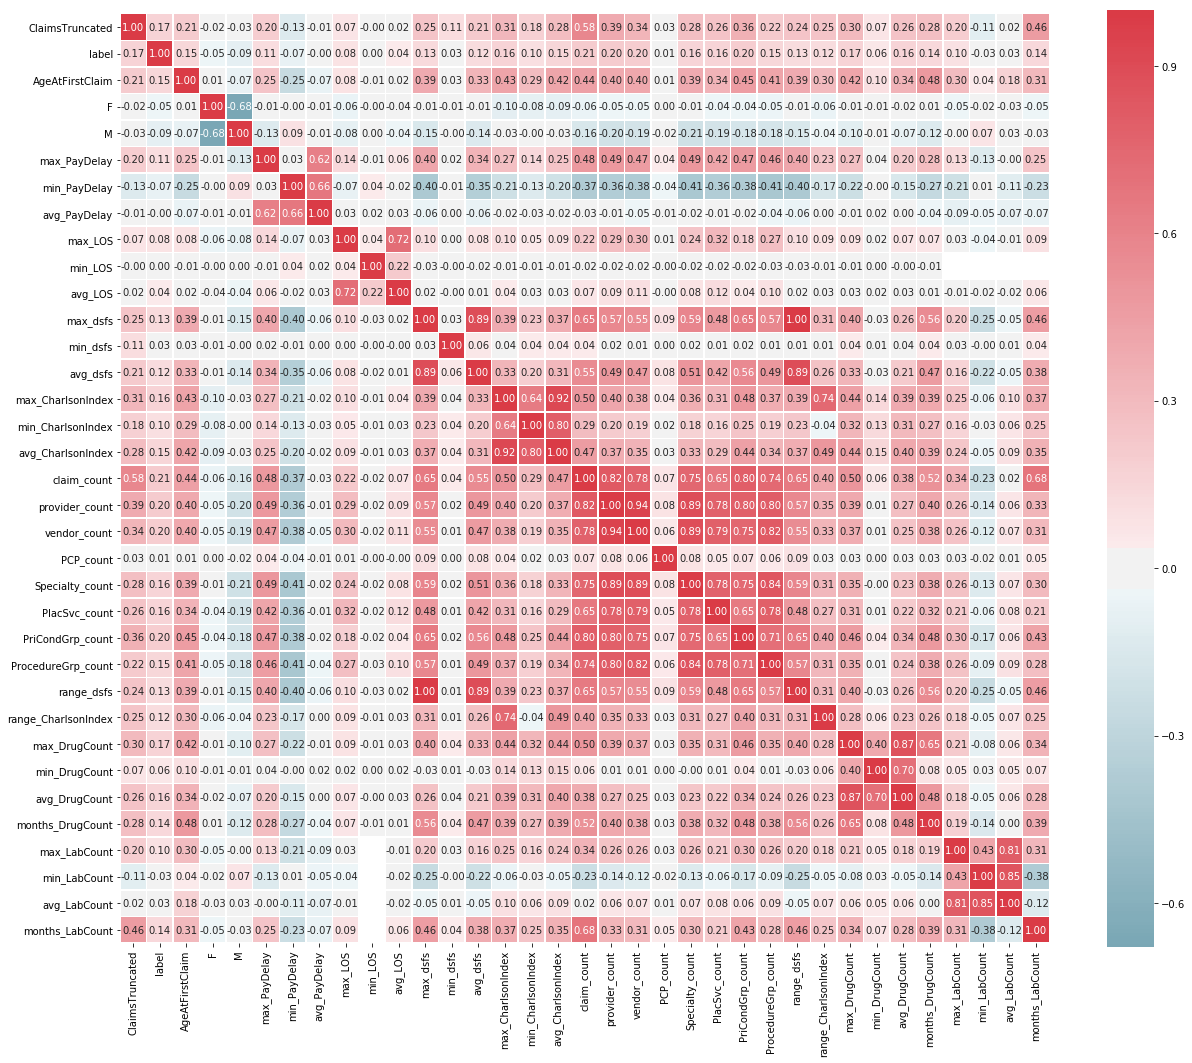

In [103]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(18, 18))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df_final,x=True)

From the above correlation matrix, we notice that the feature range_dsfs is highly correlated with max_dsfs. Hence, we can refine our model to run without this feature.

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

cols = list(df_final)
cols.pop(cols.index('label'))
feat_labels = cols
clf = RandomForestRegressor(n_estimators=250, max_depth=30, max_features='sqrt', criterion='mse', random_state=1)

clf.fit(X_train, y_train)

clf_importances = clf.feature_importances_

print("Feature Ranking:")
indices = np.argsort(clf_importances)[::-1]
for f in range(len(clf_importances)):
    print("%2d) %-*s %f" % (f + 1, 60, feat_labels[indices[f]],clf_importances[indices[f]]))

Feature Ranking:
 1) max_PayDelay                                                 0.080431
 2) F                                                            0.065325
 3) max_dsfs                                                     0.065099
 4) range_dsfs                                                   0.058113
 5) M                                                            0.055935
 6) vendor_count                                                 0.050038
 7) AgeAtFirstClaim                                              0.044701
 8) PriCondGrp_count                                             0.044003
 9) max_LabCount                                                 0.041237
10) range_CharlsonIndex                                          0.039122
11) PCP_count                                                    0.034945
12) max_DrugCount                                                0.034021
13) Specialty_count                                              0.032768
14) min_CharlsonIndex

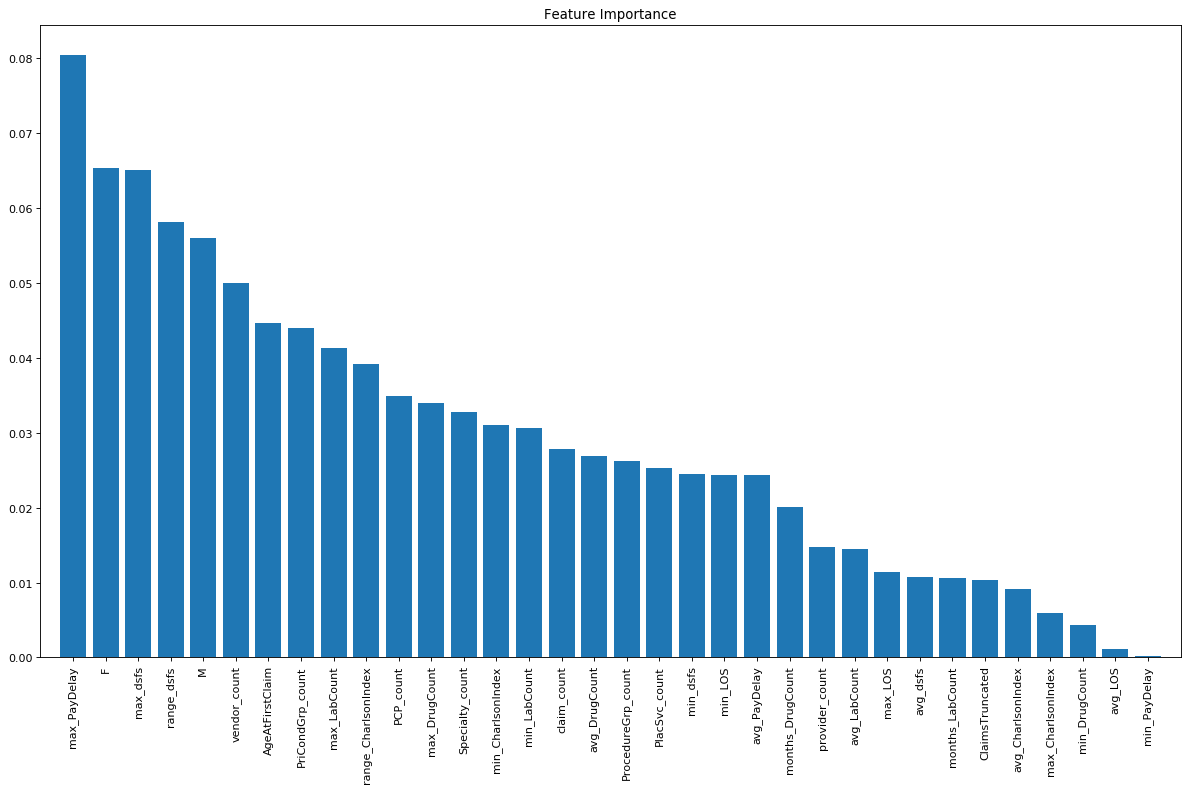

In [105]:
#plot feature importance

plt.figure(num=None, figsize=(15,10), dpi=80, facecolor='w', edgecolor='g')
plt.title('Feature Importance')
plt.bar(range(len(clf_importances)), clf_importances[indices],align='center')
plt.xticks(range(len(clf_importances)),[feat_labels[i] for i in indices], rotation=90)
plt.xlim([-1,len(clf_importances)])
plt.tight_layout()
plt.show()

The feature importance plot above ranks the different features by their relative importance.  The feature importance values are normalized. We can then use the SelectFromModel object from scikit-learn to select features after model fitting.

In [230]:
from sklearn.decomposition import PCA

prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('reduce_dim', PCA(n_components=None)),
    ('linereg', LinearRegression())
    
])

prepare_select_and_predict_pipeline.fit(df_train, y_train)


Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['ClaimsTruncated', 'AgeAtFirstClaim', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay', 'min_LOS', 'avg_LOS', 'max_LOS', 'max_dsfs',...=False)), ('linereg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [231]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score


y_train_pred = prepare_select_and_predict_pipeline.predict(df_train)
y_test_pred = prepare_select_and_predict_pipeline.predict(df_test)

print('MSE train: % .3f, test: % .3f' % (np.sqrt(mean_squared_error(y_train, y_train_pred)),np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2 train: % .3f, test: % .3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
print('explained variance score', explained_variance_score(y_test, y_test_pred))

MSE train:  0.463, test:  0.462
R^2 train:  0.079, test:  0.077
explained variance score 0.0774298305421


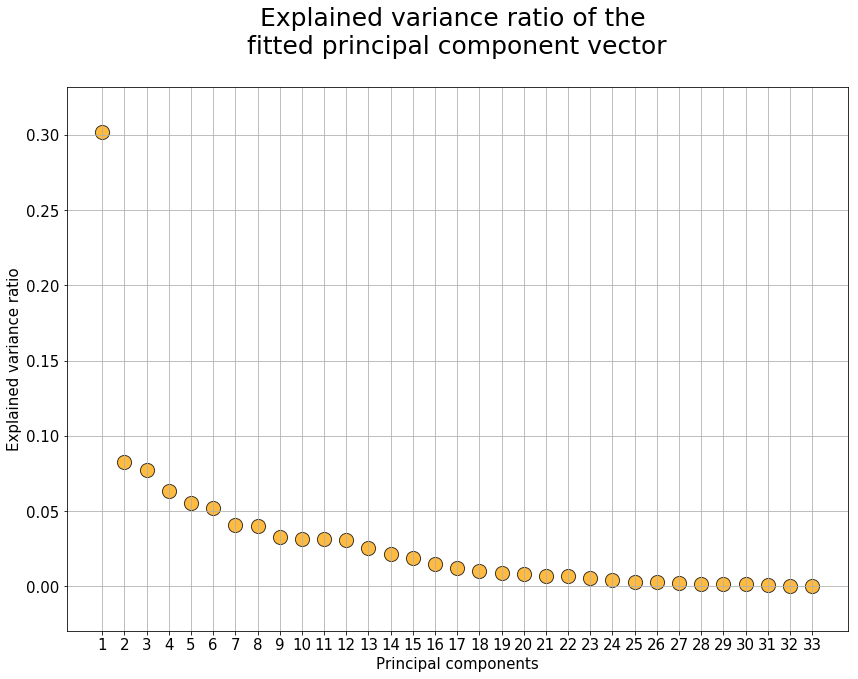

In [204]:
plt.figure(figsize=(14,10))
plt.scatter(x=[i+1 for i in range(len(prepare_select_and_predict_pipeline.named_steps['reduce_dim'].explained_variance_ratio_))],
            y=prepare_select_and_predict_pipeline.named_steps['reduce_dim'].explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(prepare_select_and_predict_pipeline.named_steps['reduce_dim'].explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot shows that the $1^{st}$ principal component explains about 33% of the total variance in the data and the next $4^{}$ components explains further 30%. Therefore, if we just consider first 6 components, they together explain 65% of the total variance.

### Highlight 2: Feature Selection
##### We performed feature importance using Random Forest regressor and Principal components analysis.  We noticed that about 28 features in the dataset explain 95% of the variance in the target variable.  During grid search, we consistently found that the dimensionality reduction using PCA yielded better RMSE when compared to the other feature selection techniques. 

In [232]:
# Let's use the full ML pipeline with feature reduction with the number of components = 6
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('reduce_dim', PCA(n_components=0.95)),
    ('linereg', LinearRegression())
    
])

prepare_select_and_predict_pipeline.fit(df_train, y_train)


Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['ClaimsTruncated', 'AgeAtFirstClaim', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay', 'min_LOS', 'avg_LOS', 'max_LOS', 'max_dsfs',...=False)), ('linereg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [233]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score


y_train_pred = prepare_select_and_predict_pipeline.predict(df_train)
y_test_pred = prepare_select_and_predict_pipeline.predict(df_test)

print('MSE train: % .3f, test: % .3f' % (np.sqrt(mean_squared_error(y_train, y_train_pred)),np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2 train: % .3f, test: % .3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
print('explained variance score', explained_variance_score(y_test, y_test_pred))

MSE train:  0.463, test:  0.462
R^2 train:  0.079, test:  0.077
explained variance score 0.0774298305421


## Phase 2 : 

### Alternate models

In [113]:
# Model 3 : ElasticNet
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score


prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('reduce_dim', PCA()),
    ('elasticnet', ElasticNet()),
])


from sklearn.model_selection import GridSearchCV

param_grid = [{
         'preparation__num_pipeline__imputer__strategy': ['mean','median','most_frequent'],
         'reduce_dim__n_components': [0.90,0.95,0.98],
         'elasticnet__l1_ratio' : [.1,.5,.7]

         }
]

grid_search = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=3,
                                scoring='neg_mean_squared_error')

grid_search.fit(df_train, y_train)

gs_best_est = grid_search.best_estimator_



In [114]:
grid_search.best_params_


{'elasticnet__l1_ratio': 0.1,
 'preparation__num_pipeline__imputer__strategy': 'median',
 'reduce_dim__n_components': 0.9}

In [115]:
regressors = [
     
    ('PCA_ElasticNet_pipe', gs_best_est) 
]

for idx, (name, regressor) in enumerate(regressors, 1):
    start = time()
    regressor.fit(df_train, y_train)
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    pipe1_scores = cross_val_score(regressor, df_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-pipe1_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(df_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, pipe1_scores)
    results.loc[len(results)] = [ name, round(train_score, 4), round(test_score, 4), round(p_value, 4), train_time, test_time,(', '.join("{}: {}".format(k, v) for k, v in grid_search.best_params_.items()))]

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-219.52, 0.00000)
Machine learning pipeline B is better than A


In [116]:
results


,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.000,Predict mean of target values
1,Linear Regression,0.4632,0.4592,0,3.661,0.002,Default Parameters
2,prepare_select_predict_pipe,0.4630,0.4590,0,76.802,0.030,"feature_selection__k: 32, preparation__num_pipeline__imputer__strategy: most_frequent"
3,PCA_ElasticNet_pipe,0.4716,0.4677,0,16.530,0.029,"elasticnet__l1_ratio: 0.1, preparation__num_pipeline__imputer__strategy: median, reduce_dim__n_components: 0.9"


In [118]:
# Model 4: Support Vector Regression
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel

prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('reduce_dim', PCA()),
    ('svr', LinearSVR()),
])    


from sklearn.model_selection import GridSearchCV

param_grid = [{
         'preparation__num_pipeline__imputer__strategy': ['mean','median','most_frequent'],
         'reduce_dim__n_components': [0.85,0.90,0.95],
         'svr__loss' : ['epsilon_insensitive','squared_epsilon_insensitive'],
         'svr__epsilon' : [0.01,0.02,0.03]
         }
]

grid_search = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=3,
                                scoring='neg_mean_squared_error')

grid_search.fit(df_train, y_train)

gs_best_est = grid_search.best_estimator_

In [119]:
grid_search.best_params_

{'preparation__num_pipeline__imputer__strategy': 'most_frequent',
 'reduce_dim__n_components': 0.95,
 'svr__epsilon': 0.01,
 'svr__loss': 'squared_epsilon_insensitive'}

In [120]:
regressors = [
     
    ('PCA_LinearSVR_pipe', gs_best_est) 
]

for idx, (name, regressor) in enumerate(regressors, 1):
    start = time()
    regressor.fit(df_train, y_train)
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    pipe1_scores = cross_val_score(regressor, df_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-pipe1_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(df_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, pipe1_scores)
    results.loc[len(results)] = [ name, round(train_score, 4), round(test_score, 4), round(p_value, 4), train_time, test_time, (', '.join("{}: {}".format(k, v) for k, v in grid_search.best_params_.items()))]

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-102.95, 0.00000)
Machine learning pipeline B is better than A


In [121]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.000,Predict mean of target values
1,Linear Regression,0.4632,0.4592,0,3.661,0.002,Default Parameters
2,prepare_select_predict_pipe,0.4630,0.4590,0,76.802,0.030,"feature_selection__k: 32, preparation__num_pipeline__imputer__strategy: most_frequent"
3,PCA_ElasticNet_pipe,0.4716,0.4677,0,16.530,0.029,"elasticnet__l1_ratio: 0.1, preparation__num_pipeline__imputer__strategy: median, reduce_dim__n_components: 0.9"
4,PCA_LinearSVR_pipe,0.4670,0.4626,0,626.110,0.034,"preparation__num_pipeline__imputer__strategy: most_frequent, reduce_dim__n_components: 0.95, svr__epsilon: 0.01, svr__loss: squared_epsilon_insensitive"


In [126]:
# Model 5: Extra Trees Regressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel

prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('etr', ExtraTreesRegressor(random_state=42)),
])    


from sklearn.model_selection import GridSearchCV

param_grid = [{
         'etr__max_depth': [5,10,15], 'etr__min_samples_leaf': [15,20,25,30]
         }
]

grid_search = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=3,
                                scoring='neg_mean_squared_error')

grid_search.fit(df_train, y_train)

gs_best_est = grid_search.best_estimator_


In [127]:
grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['ClaimsTruncated', 'AgeAtFirstClaim', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay', 'min_LOS', 'avg_LOS', 'max_LOS', 'max_dsfs',..._estimators=10, n_jobs=1,
          oob_score=False, random_state=42, verbose=0, warm_start=False))])

In [128]:
regressors = [
     
    ('ExtraTree_pipe', gs_best_est) 
]

for idx, (name, regressor) in enumerate(regressors, 1):
    start = time()
    regressor.fit(df_train, y_train)
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    pipe1_scores = cross_val_score(regressor, df_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-pipe1_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(df_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, pipe1_scores)
    results.loc[len(results)] = [ name, round(train_score, 4), round(test_score, 4), round(p_value, 4), train_time, test_time, (', '.join("{}: {}".format(k, v) for k, v in grid_search.best_params_.items()))]

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-135.60, 0.00000)
Machine learning pipeline B is better than A


In [131]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.000,Predict mean of target values
1,Linear Regression,0.4632,0.4592,0,3.661,0.002,Default Parameters
2,prepare_select_predict_pipe,0.4630,0.4590,0,76.802,0.030,"feature_selection__k: 32, preparation__num_pipeline__imputer__strategy: most_frequent"
3,PCA_ElasticNet_pipe,0.4716,0.4677,0,16.530,0.029,"elasticnet__l1_ratio: 0.1, preparation__num_pipeline__imputer__strategy: median, reduce_dim__n_components: 0.9"
4,PCA_LinearSVR_pipe,0.4670,0.4626,0,626.110,0.034,"preparation__num_pipeline__imputer__strategy: most_frequent, reduce_dim__n_components: 0.95, svr__epsilon: 0.01, svr__loss: squared_epsilon_insensitive"
5,ExtraTree_pipe,0.4609,0.4565,0,67.754,0.046,"etr__max_depth: 10, etr__min_samples_leaf: 20"


In [132]:
# Model 6 : Random Forest
from sklearn.ensemble import RandomForestRegressor

prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('rf', RandomForestRegressor(random_state=42))
    
])


from sklearn.model_selection import GridSearchCV

param_grid = [{
         'rf__max_depth': [10,15,20,25], 'rf__n_estimators': [250,325,400,500,1000],'rf__warm_start': [True,False]
         }
]

grid_search = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=3,
                                scoring='neg_mean_squared_error')

grid_search.fit(df_train, y_train)

gs_best_est = grid_search.best_estimator_

In [133]:
grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['ClaimsTruncated', 'AgeAtFirstClaim', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay', 'min_LOS', 'avg_LOS', 'max_LOS', 'max_dsfs',...stimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=True))])

In [134]:
regressors = [
     
    ('RandomForest_pipe', gs_best_est) 
]

for idx, (name, regressor) in enumerate(regressors, 1):
    start = time()
    regressor.fit(df_train, y_train)
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    pipe1_scores = cross_val_score(regressor, df_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-pipe1_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(df_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, pipe1_scores)
    results.loc[len(results)] = [ name, round(train_score, 4), round(test_score, 4), round(p_value, 4), train_time, test_time, (', '.join("{}: {}".format(k, v) for k, v in grid_search.best_params_.items()))]

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-133.08, 0.00000)
Machine learning pipeline B is better than A


In [135]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.000,Predict mean of target values
1,Linear Regression,0.4632,0.4592,0,3.661,0.002,Default Parameters
2,prepare_select_predict_pipe,0.4630,0.4590,0,76.802,0.030,"feature_selection__k: 32, preparation__num_pipeline__imputer__strategy: most_frequent"
3,PCA_ElasticNet_pipe,0.4716,0.4677,0,16.530,0.029,"elasticnet__l1_ratio: 0.1, preparation__num_pipeline__imputer__strategy: median, reduce_dim__n_components: 0.9"
4,PCA_LinearSVR_pipe,0.4670,0.4626,0,626.110,0.034,"preparation__num_pipeline__imputer__strategy: most_frequent, reduce_dim__n_components: 0.95, svr__epsilon: 0.01, svr__loss: squared_epsilon_insensitive"
5,ExtraTree_pipe,0.4609,0.4565,0,67.754,0.046,"etr__max_depth: 10, etr__min_samples_leaf: 20"
6,RandomForest_pipe,0.4607,0.4556,0,10781.413,1.839,"rf__max_depth: 10, rf__n_estimators: 1000, rf__warm_start: True"


In [136]:
# Model 7 : Gradient Boosting Regressor Trees with early stopping
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=10, n_estimators=250, subsample=0.25)
gbrt.fit(X_train, y_train)

y_pred = gbrt.predict(X_val)

errors = [mean_squared_error(y_val, y_pred)
         for y_pred in gbrt.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors)

bst_n_estimators
# gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)

# gbrt_best.fit(X_train, y_train)


17

In [137]:
# Model 7 : Gradient Boosting Regressor Trees
from sklearn.ensemble import GradientBoostingRegressor

prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('gbrt', GradientBoostingRegressor())
    
])


from sklearn.model_selection import GridSearchCV

param_grid = [{
         'gbrt__n_estimators':[17, 21], 'gbrt__max_depth':[7,10,15], 'gbrt__learning_rate':[0.05,0.1],
         'gbrt__subsample' :[0.25,0.50,0.75]
         }
]

grid_search = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=3,
                                scoring='neg_mean_squared_error')

grid_search.fit(df_train, y_train)

gs_best_est = grid_search.best_estimator_

In [138]:
grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['ClaimsTruncated', 'AgeAtFirstClaim', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay', 'min_LOS', 'avg_LOS', 'max_LOS', 'max_dsfs',...s=21, presort='auto', random_state=None,
             subsample=0.75, verbose=0, warm_start=False))])

In [139]:
regressors = [
     
    ('GradientBoostingRegTree_pipe', gs_best_est) 
]

for idx, (name, regressor) in enumerate(regressors, 1):
    start = time()
    regressor.fit(df_train, y_train)
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    pipe1_scores = cross_val_score(regressor, df_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-pipe1_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(df_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, pipe1_scores)
    results.loc[len(results)] = [ name, round(train_score, 4), round(test_score, 4), round(p_value, 4), train_time, test_time, (', '.join("{}: {}".format(k, v) for k, v in grid_search.best_params_.items()))]

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-152.96, 0.00000)
Machine learning pipeline B is better than A


In [140]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.000,Predict mean of target values
1,Linear Regression,0.4632,0.4592,0,3.661,0.002,Default Parameters
2,prepare_select_predict_pipe,0.4630,0.4590,0,76.802,0.030,"feature_selection__k: 32, preparation__num_pipeline__imputer__strategy: most_frequent"
3,PCA_ElasticNet_pipe,0.4716,0.4677,0,16.530,0.029,"elasticnet__l1_ratio: 0.1, preparation__num_pipeline__imputer__strategy: median, reduce_dim__n_components: 0.9"
4,PCA_LinearSVR_pipe,0.4670,0.4626,0,626.110,0.034,"preparation__num_pipeline__imputer__strategy: most_frequent, reduce_dim__n_components: 0.95, svr__epsilon: 0.01, svr__loss: squared_epsilon_insensitive"
5,ExtraTree_pipe,0.4609,0.4565,0,67.754,0.046,"etr__max_depth: 10, etr__min_samples_leaf: 20"
6,RandomForest_pipe,0.4607,0.4556,0,10781.413,1.839,"rf__max_depth: 10, rf__n_estimators: 1000, rf__warm_start: True"
7,GradientBoostingRegTree_pipe,0.4615,0.4566,0,326.444,0.045,"gbrt__learning_rate: 0.1, gbrt__max_depth: 7, gbrt__n_estimators: 21, gbrt__subsample: 0.75"


In [141]:
# Model 8: K Nearest Neighbor 

from sklearn.neighbors import KNeighborsRegressor

prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('reduce_dim',PCA()),
    ('knn', KNeighborsRegressor()),
    
])

from sklearn.model_selection import GridSearchCV

param_grid = [{
         'preparation__num_pipeline__imputer__strategy': ['mean','median','most_frequent'],
         'reduce_dim__n_components':[0.90,0.95,0.98],
         'knn__weights':['uniform'], 'knn__n_neighbors':[10, 20, 30, 40, 50]
         }
]

grid_search = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=3,
                                scoring='neg_mean_squared_error')

grid_search.fit(df_train, y_train)

gs_best_est = grid_search.best_estimator_

In [142]:
gs_best_est

Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['ClaimsTruncated', 'AgeAtFirstClaim', 'min_PayDelay', 'max_PayDelay', 'avg_PayDelay', 'min_LOS', 'avg_LOS', 'max_LOS', 'max_dsfs',...kowski',
          metric_params=None, n_jobs=1, n_neighbors=50, p=2,
          weights='uniform'))])

In [143]:
regressors = [
     
    ('knn_pipe', gs_best_est) 
]

for idx, (name, regressor) in enumerate(regressors, 1):
    start = time()
    regressor.fit(df_train, y_train)
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    pipe1_scores = cross_val_score(regressor, df_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-pipe1_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(df_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)

    p_value = ttest(baseline_scores, pipe1_scores)
    results.loc[len(results)] = [ name, round(train_score, 4), round(test_score, 4), round(p_value, 4), train_time, test_time, (', '.join("{}: {}".format(k, v) for k, v in grid_search.best_params_.items()))]

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-86.94, 0.00000)
Machine learning pipeline B is better than A


In [144]:
results

,ExpID,Train RMSE (Mean),Test RMSE,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline Model (Mean),0.4823,0.4791,---,0.001,0.000,Predict mean of target values
1,Linear Regression,0.4632,0.4592,0,3.661,0.002,Default Parameters
2,prepare_select_predict_pipe,0.4630,0.4590,0,76.802,0.030,"feature_selection__k: 32, preparation__num_pipeline__imputer__strategy: most_frequent"
3,PCA_ElasticNet_pipe,0.4716,0.4677,0,16.530,0.029,"elasticnet__l1_ratio: 0.1, preparation__num_pipeline__imputer__strategy: median, reduce_dim__n_components: 0.9"
4,PCA_LinearSVR_pipe,0.4670,0.4626,0,626.110,0.034,"preparation__num_pipeline__imputer__strategy: most_frequent, reduce_dim__n_components: 0.95, svr__epsilon: 0.01, svr__loss: squared_epsilon_insensitive"
5,ExtraTree_pipe,0.4609,0.4565,0,67.754,0.046,"etr__max_depth: 10, etr__min_samples_leaf: 20"
6,RandomForest_pipe,0.4607,0.4556,0,10781.413,1.839,"rf__max_depth: 10, rf__n_estimators: 1000, rf__warm_start: True"
7,GradientBoostingRegTree_pipe,0.4615,0.4566,0,326.444,0.045,"gbrt__learning_rate: 0.1, gbrt__max_depth: 7, gbrt__n_estimators: 21, gbrt__subsample: 0.75"
8,knn_pipe,0.4693,0.4647,0,1340.914,41.362,"knn__n_neighbors: 50, knn__weights: uniform, preparation__num_pipeline__imputer__strategy: median, reduce_dim__n_components: 0.95"


### Highlight 3: Results discussion
#####  The above results table shows the results obtained from eight different regressor models via individual ML pipelines.  The models were trained individually and the meta parameters were optimized to reduce the RMSE of the individual model. The pipelines were designed to accomodate GridSearchCV to select the best parameters which is displayed in the column experiment description. The random-forest based algorithm uses past healthcare claims to predict a user’s number of hospital visits in the next year (predictions are for log(1+number of visits)). The algorithm has low error overall (the average difference between the true and predicted number of visits is 0.45) The Random Forest model is the winner model both in terms of Train RMSE(0.4607) and Test RMSE(0.4556).  However, the Extra Trees model came close to the winner with a far less training time.   Overall, the tree ensemble models performed better than the regular regressor models.   This is because ensemble models combine the predictions of several base estimators in order to improve generalizability / robustness over a single estimator.

In [114]:
# Significance test of the top two models (Random Forest Vs Extra Trees)

# Winner Model
from sklearn.ensemble import RandomForestRegressor
RFprepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('rf', RandomForestRegressor(random_state=42))
    
])

RFparam_grid = [{
         'rf__max_depth': [10,15,20,25], 'rf__n_estimators': [250,325,400,500,1000],'rf__warm_start': [True,False]
         }
]

RFgrid_search = GridSearchCV(RFprepare_select_and_predict_pipeline, RFparam_grid, cv=3,
                                scoring='neg_mean_squared_error')

RFgrid_search.fit(df_train, y_train)

RFgs_best_est = RFgrid_search.best_estimator_

# Runner up Model
from sklearn.ensemble import ExtraTreesRegressor

ETprepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('etr', ExtraTreesRegressor(random_state=42)),
])    

ETparam_grid = [{
         'etr__max_depth': [5,10,15], 'etr__min_samples_leaf': [15,20,25,30]
         }
]

ETgrid_search = GridSearchCV(ETprepare_select_and_predict_pipeline, ETparam_grid, cv=3,
                                scoring='neg_mean_squared_error')

ETgrid_search.fit(df_train, y_train)

ETgs_best_est = ETgrid_search.best_estimator_



In [115]:
regressors1 = [('rf_pipe', RFgs_best_est)]

for idx, (name, regressor) in enumerate(regressors1, 1):
    start = time()
    regressor.fit(df_train, y_train)
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    pipe1_scores = cross_val_score(regressor, df_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-pipe1_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(df_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)
    
regressors2 = [('et_pipe', ETgs_best_est)]


for idx, (name, regressor) in enumerate(regressors2, 1):
    start = time()
    regressor.fit(df_train, y_train)
    cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=42)
    pipe2_scores = cross_val_score(regressor, df_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    train_score = np.sqrt(-pipe2_scores.mean())
    train_time = np.round(time()-start,3)
    start = time()
    test_preds = regressor.predict(df_val)
    test_score = np.sqrt(mean_squared_error(y_val, test_preds))
    test_time = np.round(time()-start,3)
    
    

p_value = ttest(pipe2_scores, pipe1_scores)

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-2.73, 0.01072)
Machine learning pipeline B is better than A


### Highlight 4: Statistical signifiance test discussion
##### The ttest results above shows that both the ML pipelines are different thereby rejecting the null hypothesis(H0).  The Random Forest ML (pipe1_scores) is better than Extra Trees ML(pipe2_scores).

### Highlight 5: Final Submission

##### We have chosen to use the stacking regressor from mlextend package. Stacking regression is an ensmeble learning technique which combines multiple regression models via a meta-regressor.  The individual regression models are trained on the complete training set and then the meta-regressor is fitted based on the meta features of the individual regression models in the ensemble. 




In [106]:
from mlxtend.regressor import StackingRegressor
RANDOM_SEED = 42
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

# initialize estimators using optimized hyperparameters from the previous steps

lr =  LinearRegression()
en = ElasticNet(l1_ratio=0.1)
svr = LinearSVR(epsilon=0.01, loss='squared_epsilon_insensitive')
etr = ExtraTreeRegressor(max_depth=10, min_samples_leaf=20)
rf = RandomForestRegressor(max_depth=10,n_estimators=1000,warm_start=True, random_state=RANDOM_SEED)
gbr =GradientBoostingRegressor(max_depth=7, n_estimators=21, subsample=0.75, learning_rate=0.1)
knn = KNeighborsRegressor(weights='uniform',n_neighbors=50)


regressors1 = [lr, en, knn]

stack1 = StackingRegressor(regressors=regressors1, 
                           meta_regressor=svr, use_features_in_secondary=True, verbose=2)

stack1_pipeline = Pipeline([
        ('preparation', full_pipeline),
        ('reduce_dim', PCA(n_components=0.95)),
        ('stack1', stack1)
])

stack1_pipeline.fit(df_train, y_train)
pred_train1 = stack1_pipeline.predict(df_train)
pred_val1 = stack1_pipeline.predict(df_val)
pred_test1 = stack1_pipeline.predict(df_test)



regressors2 = [etr, gbr]

stack2 = StackingRegressor(regressors=regressors2, 
                           meta_regressor=rf, use_features_in_secondary=True,verbose=2)

stack2_pipeline = Pipeline([
        ('preparation', full_pipeline),
        ('stack2', stack2)
])

stack2_pipeline.fit(df_train, y_train)
pred_train2 = stack2_pipeline.predict(df_train)
pred_val2 = stack2_pipeline.predict(df_val)
pred_test2 = stack2_pipeline.predict(df_test)

# Evaluate the fit

print("Root Mean Squared Error stack1 - Validation set: %.4f"
      % np.sqrt(np.mean((pred_val1 - y_val) ** 2)))

print("Root Mean Squared Error stack1 - Heldout/test set: %.4f"
      % np.sqrt(np.mean((pred_test1 - y_test) ** 2)))

print("Root Mean Squared Error stack2 - Validation set: %.4f"
      % np.sqrt(np.mean((pred_val2 - y_val) ** 2)))

print("Root Mean Squared Error stack2 - Heldout/test set: %.4f"
      % np.sqrt(np.mean((pred_test2 - y_test) ** 2)))



def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Weighted RMSE

print('Weighted RMSE score on Training data: %.4f')
print(rmse(y_train,(pred_train1*0.5 + pred_train2*0.5)))

print('Weighted RMSE score on Validation data: %.4f')
print(rmse(y_val,(pred_val1*0.5 + pred_val2*0.5)))


print('Weighted RMSE score on Heldout/Test data: %.4f')
print(rmse(y_test,(pred_test1*0.5 + pred_test2*0.5)))




Fitting 3 regressors...
Fitting regressor1: linearregression (1/3)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Fitting regressor2: elasticnet (2/3)
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Fitting regressor3: kneighborsregressor (3/3)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=50, p=2,
          weights='uniform')
Fitting 2 regressors...
Fitting regressor1: extratreeregressor (1/2)
ExtraTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
          max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=20,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          random_state=None, splitter='random')
Fitting regressor2: gradientboos

In [75]:
# Winner model on Held out/Test data - based on parameter tuning using GridSearchCV

rf = RandomForestRegressor(max_depth=10,n_estimators=1000,warm_start=True, random_state=RANDOM_SEED)

Bestmodel_pipeline = Pipeline([
        ('preparation', full_pipeline),
        ('rf', rf)
])

Bestmodel_pipeline.fit(df_train, y_train)
bestpred_train = Bestmodel_pipeline.predict(df_train)
bestpred_val = Bestmodel_pipeline.predict(df_val)
bestpred_test = Bestmodel_pipeline.predict(df_test)

print("Root Mean Squared Error Best Model - Validation set: %.4f"
      % np.sqrt(np.mean((bestpred_val - y_val) ** 2)))

print("Root Mean Squared Error Best Model - Heldout/test set: %.4f"
      % np.sqrt(np.mean((bestpred_test - y_test) ** 2)))


Root Mean Squared Error Best Model - Validation set: 0.4556
Root Mean Squared Error Best Model - Heldout/test set: 0.4585


### Highlight 6 : Final Submission Discussion
##### To optimize the RMSE we used the blending of linear models(stack1) with ensemble tree models(stack2).   Stack1 consisted of linear regression, Linear Support Vector Regression(LinearSVR), K Nearest neighbors regressor and ElasticNet with LinearSVR as the meta learner.  The reason for choosing the LinearSVR as meta model is because of its best performance when trained individually.   Stack2 consisted of Extra Trees and Gradient Boosting Trees as base regressors with Random Forest being the meta-regressor.  For both stacks, we used the hyperparameter, use_features_in_secondary which helps the meta-regressor to be trained both on the predictions of the original regressors and the data. Finally, we decided to choose the weighted RMSE where we assign weights to the prediction values of both the stacks.  

##### Final Results - Stacked Regression Model

##### Root Mean Squared Error stack1 - Validation set: 0.4657       |    Root Mean Squared Error stack2 - Validation set: 0.4688
##### Root Mean Squared Error stack1 - Heldout/test set: 0.4690   |    Root Mean Squared Error stack2 - Heldout/test set: 0.4712

*****************************************************************
##### Weighted RMSE with stack1 & stack2 having equal weights:

##### Weighted RMSE score on Training data: 0.4231
##### Weighted RMSE score on Validation data: 0.4600
##### Weighted RMSE score on Heldout/Test data: 0.4628

*****************************************************************
##### Best Model - Random Forest

##### RMSE - Best Model - Validation set: 0.4556
##### RMSE - Best Model - Heldout/test set: 0.4585


### Highlight 7: Next steps 
##### 1) Explore additional feature engineering
##### 2) Expand GridSearchCV in the quest for better hyperparameter tuning
##### 3) Experiment with stacking and blending combinations using StackingCVRegressor 
##### 4) Adding additional models to our research such as XGBoost, Bagging Regressor